## <b>Bank Churn prediction



### **Context**:

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### **Objective**:

Let us consider you are working as Data scientist with the  bank and you need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### **Data Dictionary**:

The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features as follows:

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer

CreditScore: It defines the credit history of the customer.
  
Geography: A customer’s location
   
Gender: It defines the Gender of the customer
   
Age: Age of the customer
    
Tenure: Number of years for which the customer has been with the bank

NumOfProducts: refers to the number of products that a customer has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

EstimatedSalary: Estimated salary

isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

Exited : whether or not the customer left the bank within six month. It can take two values

0=No ( Customer did not leave the bank )
1=Yes ( Customer left the bank )

In [1]:
#pip install --upgrade tensorflow

In [2]:
#!pip install scikeras

In [3]:
#!pip install dask-ml --user

In [4]:
#!pip install dask_ml

In [5]:
#!pip install keras-tuner

In [6]:
#pip install -U imbalanced-learn

In [7]:
#pip install -U scikit-learn

### Importing necessary libraries

In [8]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the dataset

In [10]:
ds = pd.read_csv("/content/drive/MyDrive/Nigerians Projects/Ose Odeh/Churn.csv")

### Data Overview

#### Displaying the first few rows of the dataset

In [11]:
ds.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

#### Displaying the last few rows of the dataset

In [12]:
ds.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

#### Checking the shape of the dataset

In [13]:
ds.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

#### Checking the data types of the columns for the dataset

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.
* The data occupies a total of 1.1 MB

#### Checking for duplicate values

In [15]:
ds.duplicated().sum()

0

#### Checking for missing values

In [16]:
round(ds.isnull().sum() / ds.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [17]:
# creating a copy of the data so that original data remains unchanged
Ds = ds.copy()


In [18]:
Ds["Exited"].value_counts(1)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [19]:
# Let's view the statistical summary of the numerical columns in the data
Ds.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

Outside of the row number, customer id and the exited variable, there are only eight numerical columns in the dataset.

* The maximum number of credit score is 850, but at least 75% of customers had credit score of 718.
* 50% of the rows are customers of the age between 37 and 92, so the dataset is weighted towards the higher side with respect to this column.
* The median tenure by the customers was 5 years.
* 50% of the rows are customers with the balance between 97199 and 250898, so the dataset is weighted towards the higher side with respect to this column.
* Number of products ranges from 1 to 4 with 1 being the median.
* 50% of the customers have cards and they are active members.
* 50% of the rows are customers with the estimated salary between 100,194 and 199,992, so the dataset is weighted towards the higher side with respect to this column.


In [20]:
# Let's view the statistical summary of the categorical columns in the data
Ds.describe(include="object").T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

Outside of the row surname variable, there are only two categorical columns in the dataset.
* The customers originated from  three disntict geographical locations with France accounting for the highest number(5014)
* The customers were from two unique genders with males being dorminant(5457)

In [21]:
# Let's check the number of unique values in each column
Ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [22]:
for i in Ds.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Ds[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


* The 'Surname' column has 2932 unique categories, and the surname with the highest number of customers is Smith  .
* Over 55% of the customers in this dataset are males while 45% are females, this shows  it is not highly gender-skewed.
* Most of the customers (~50%) reside in france.

### Data Pre-processing

In [23]:
Ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1,inplace=True)

### Exploratory Data Analysis


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the target feature related to each categorical feature?
2. How is the target feature related to each numerical feature?
3. How are the features correlated to each other?
4. How does the distribution vary for each feature?

### Univariate Analysis

In [24]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
Ds.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

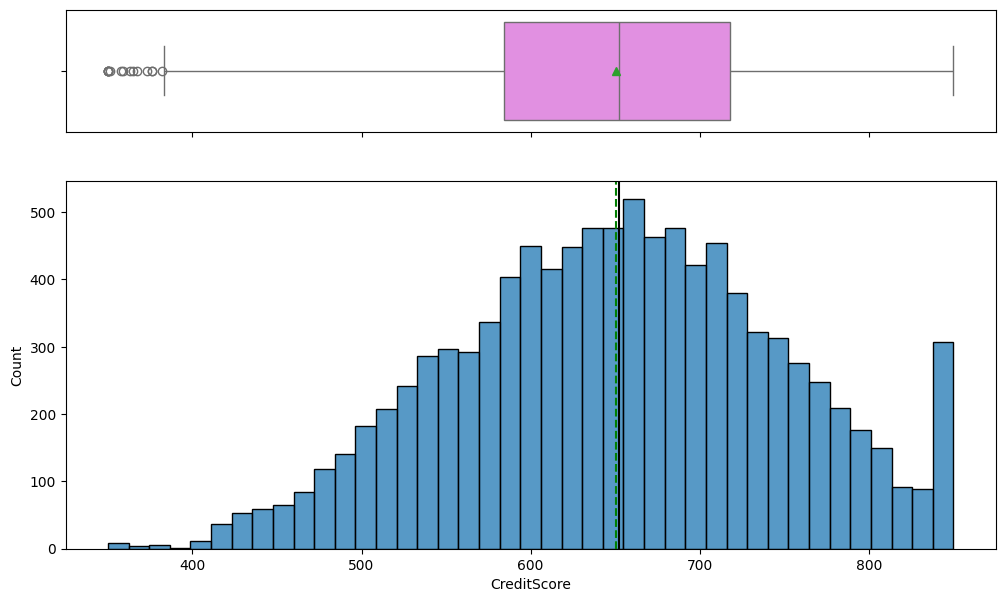

In [26]:
histogram_boxplot(Ds, "CreditScore")

* From the above plot, we observe that there are many customers where the credit score is less than 650, the data also has some outliers on the lower whisker.

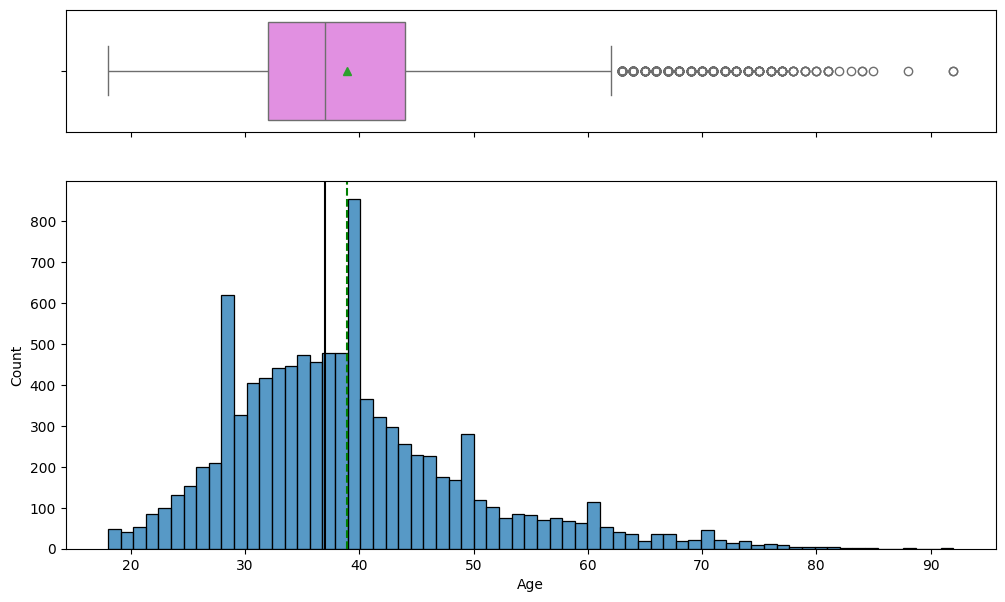

In [27]:
histogram_boxplot(Ds, "Age")

* Many customers are from the age of 40 and above with some outliers on the upper whisker.

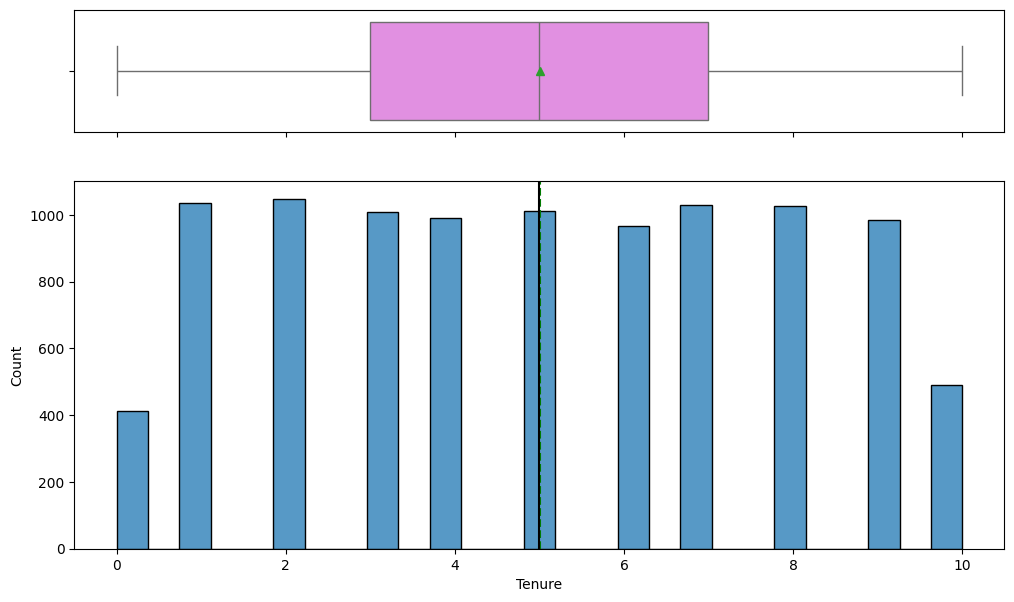

In [28]:
histogram_boxplot(Ds, "Tenure")

* Customer's tenure is normally distributed

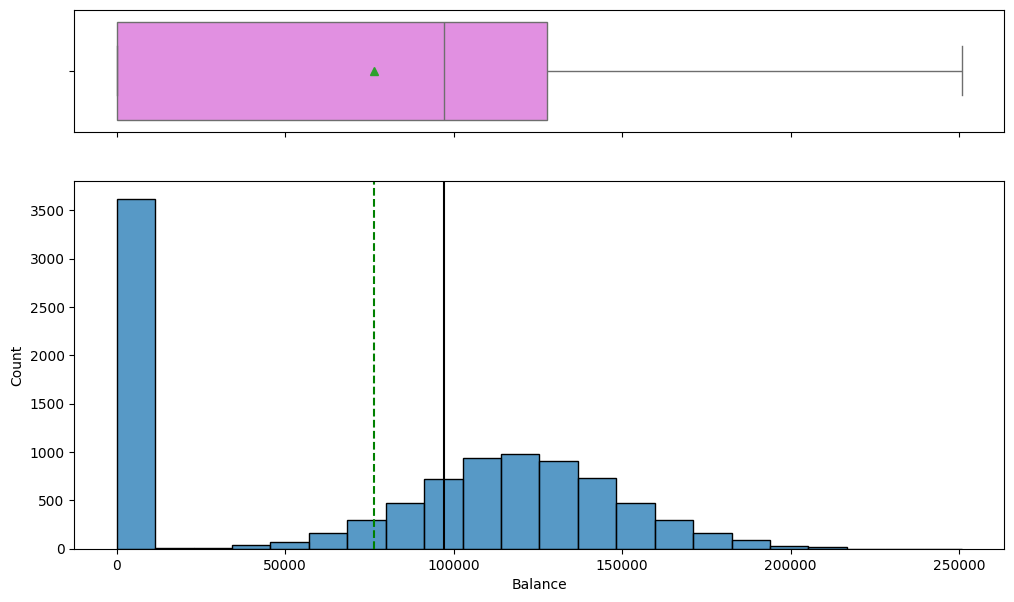

In [29]:
histogram_boxplot(Ds, "Balance")

* From the above plot, we observe that there are many customers with a balance more than 100,000.

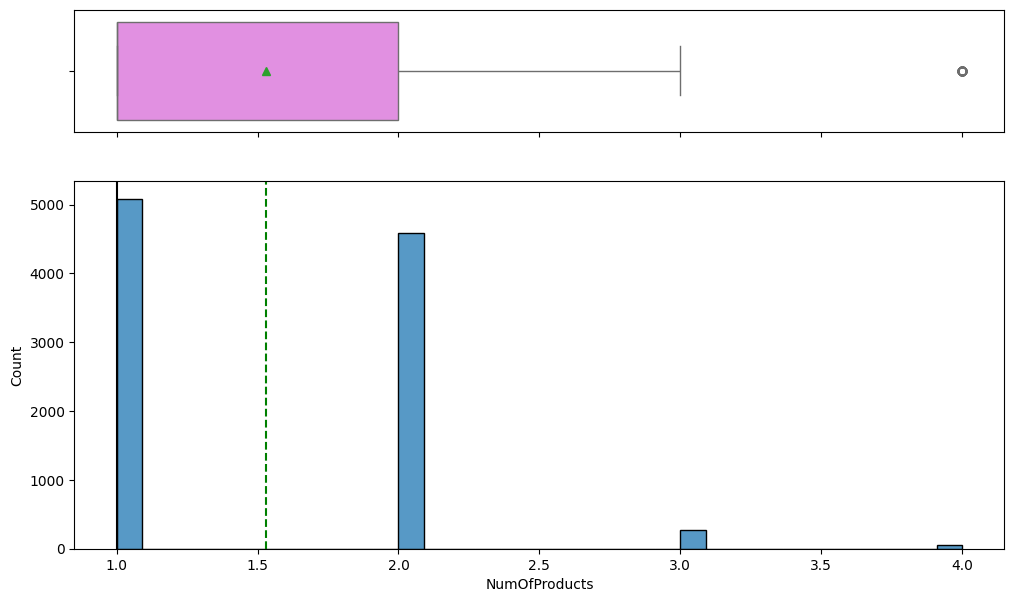

In [30]:
histogram_boxplot(Ds, "NumOfProducts")

* From the plot, we observe that the measures of central tendency with respect to number of products seem to be 1.5, despite a maximum value of 4 products. So most of the customers in this dataset had less than 2 products.

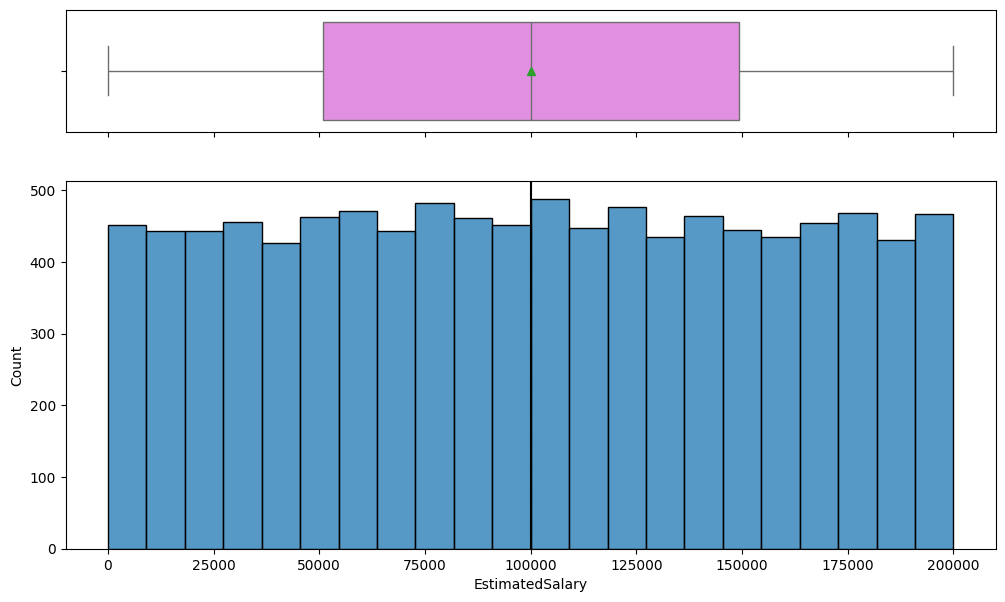

In [31]:
histogram_boxplot(Ds, "EstimatedSalary")

* Estimated salary is normally distributed.

In [32]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

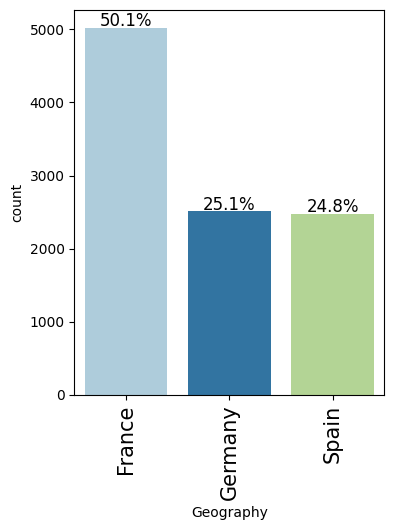

In [33]:
labeled_barplot(Ds, 'Geography', perc=True)

* Most of the customers reside in France(50.1%).
* 25.1% of the customers reside in Germany while the remaining 24.8% are from Spain.

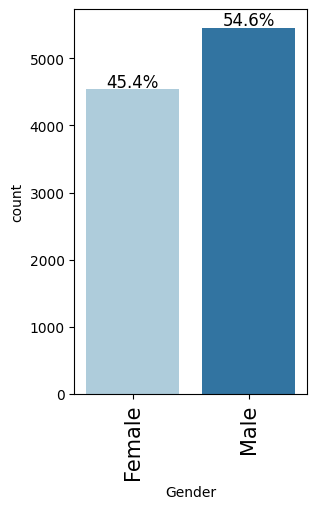

In [34]:
labeled_barplot(Ds, 'Gender', perc=True)

* There are far more males in this dataset in comparison to females.
* Over 54.6% of this dataset is male, this is almost normal distributed. Therefore, this could not be a limitation with respect to implementing this model in the real world, since gender balance is highly important to create machine learning models that are practically implemented on datasets related to people.

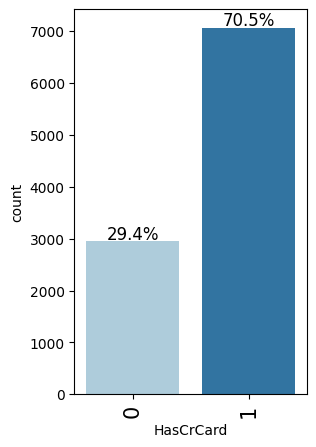

In [35]:
labeled_barplot(Ds, 'HasCrCard', perc=True)

* 70.5% of the customers have card while the remaining 29.4% lacks.

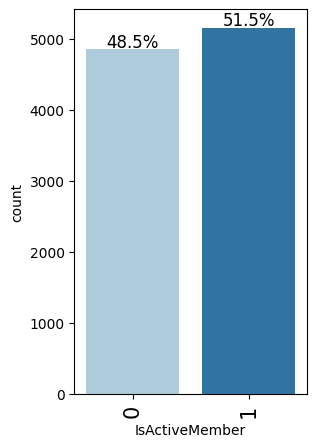

In [36]:
labeled_barplot(Ds, 'IsActiveMember', perc=True)

* 51.5% of the customers are active members while the remaining 48.5% are inactive.

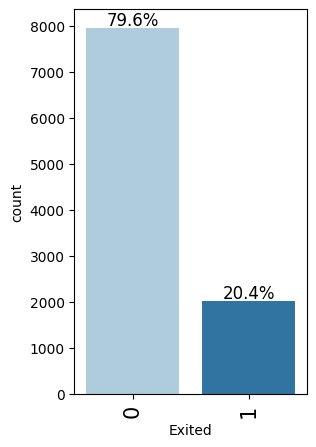

In [37]:
labeled_barplot(Ds, 'Exited', perc=True)

* 20.4% of the customers exited while the remaining 79.6% did not exit.

Exited
0    7963
1    2037
Name: count, dtype: int64


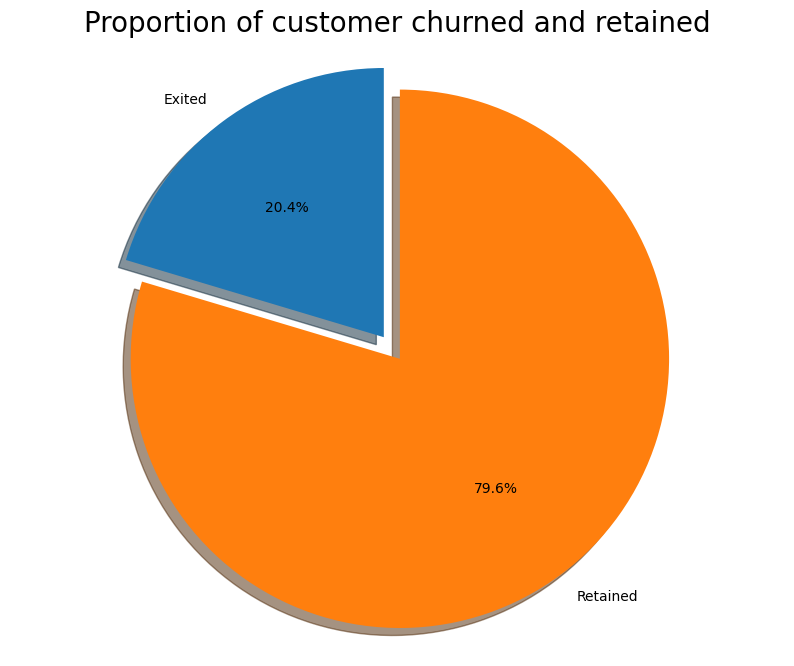

In [38]:
print(Ds.Exited.value_counts())
labels = 'Exited', 'Retained'
sizes = [Ds.Exited[Ds['Exited']==1].count(),Ds.Exited[Ds['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

* This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~21% of the customers in this dataset are actually exited.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced exited variables.

### Bivariate Analysis

In [39]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

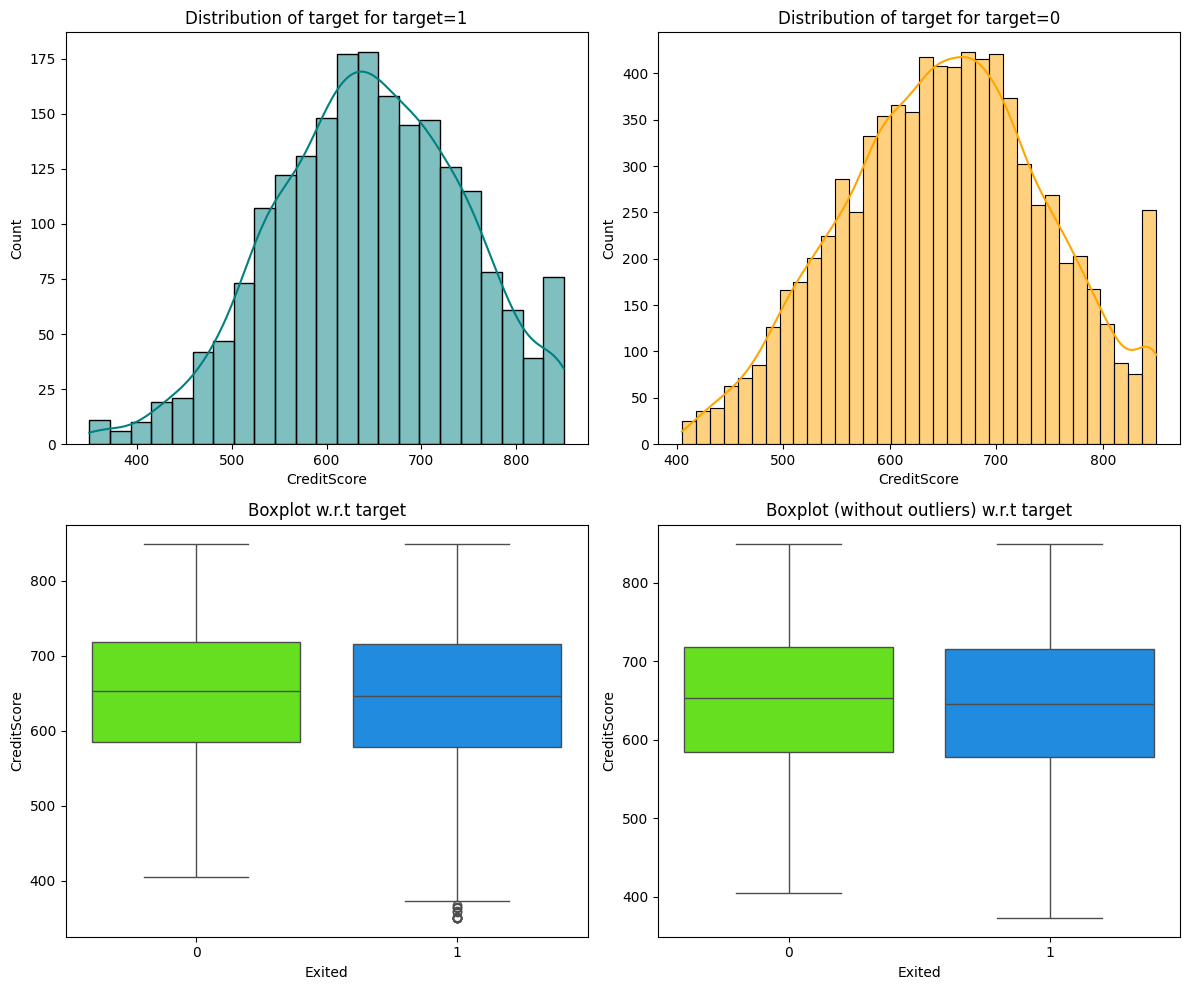

In [40]:
distribution_plot_wrt_target(Ds, "CreditScore", "Exited")

* From the above plot, we observe that customers with credit score of 650, are not willing to exit.

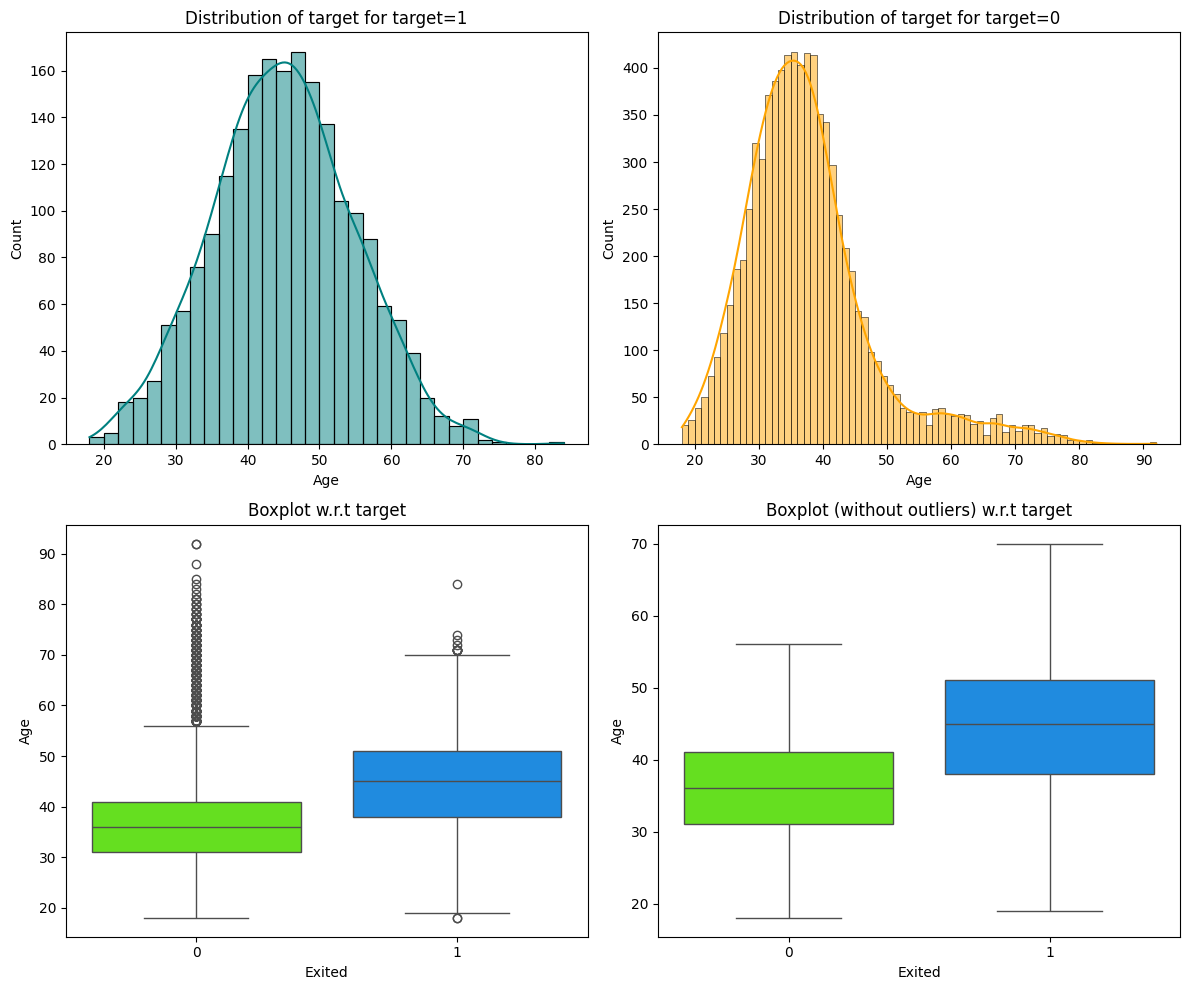

In [41]:
distribution_plot_wrt_target(Ds, "Age", "Exited")

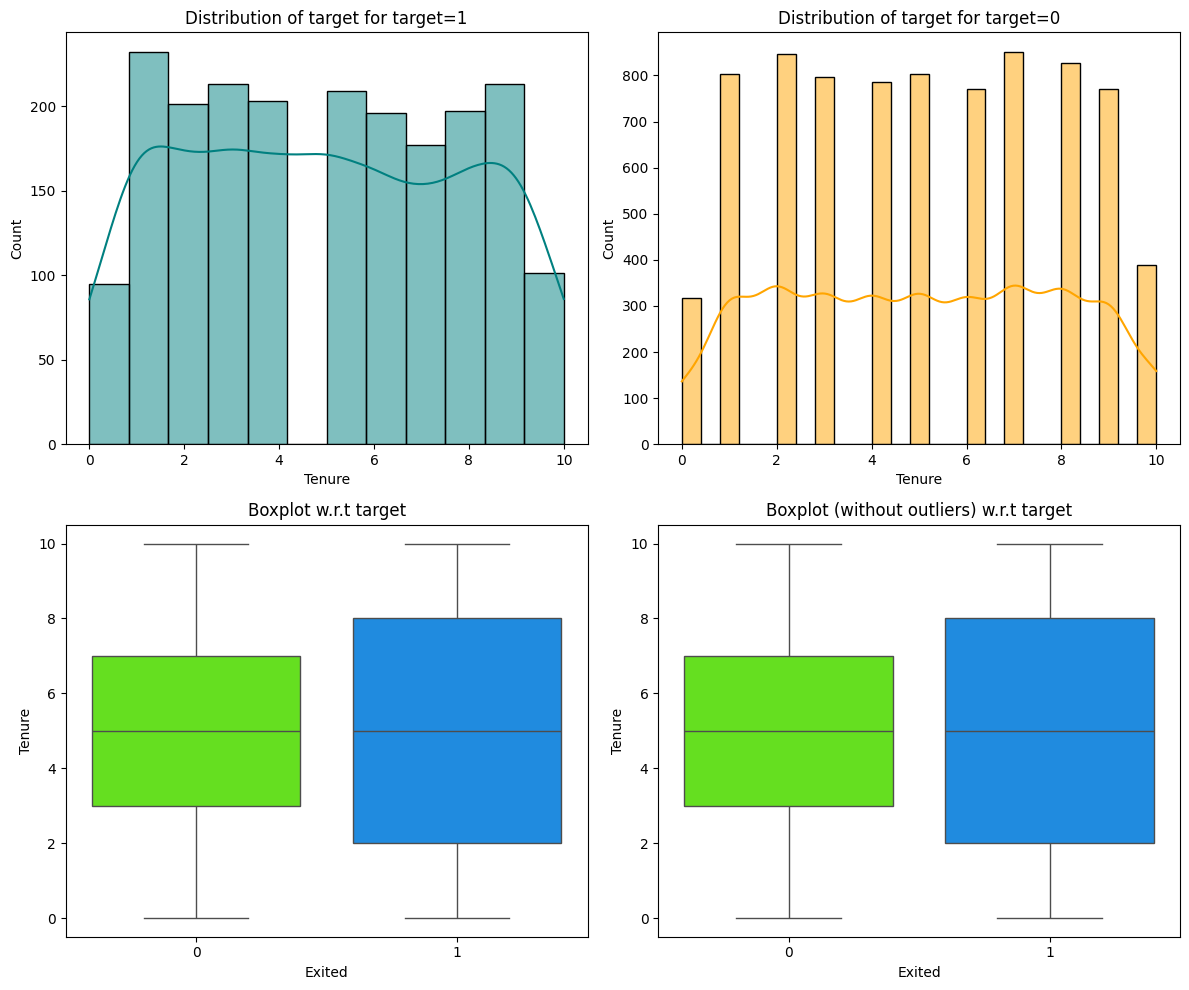

In [42]:
distribution_plot_wrt_target(Ds, "Tenure", "Exited")

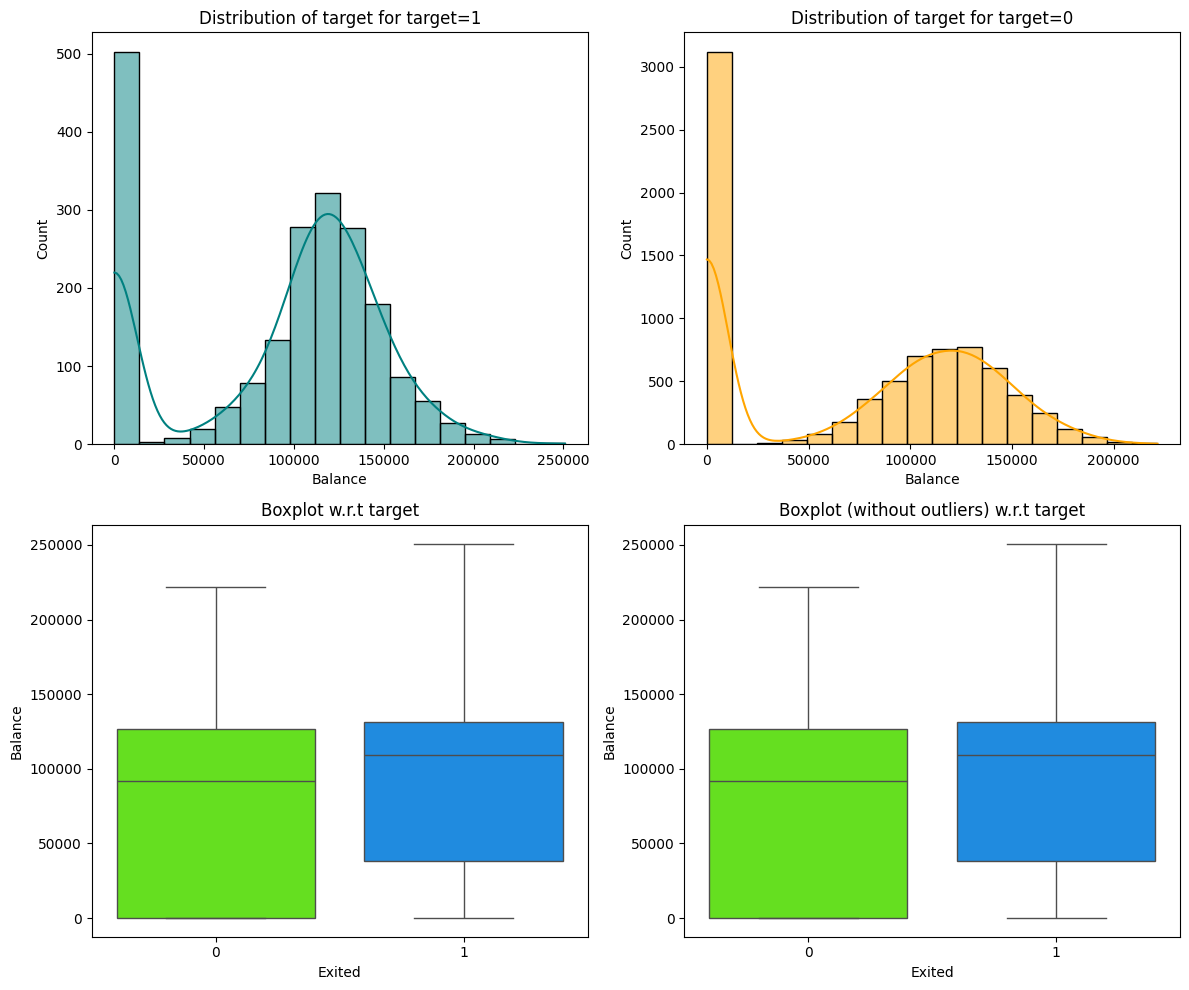

In [43]:
distribution_plot_wrt_target(Ds, "Balance", "Exited")

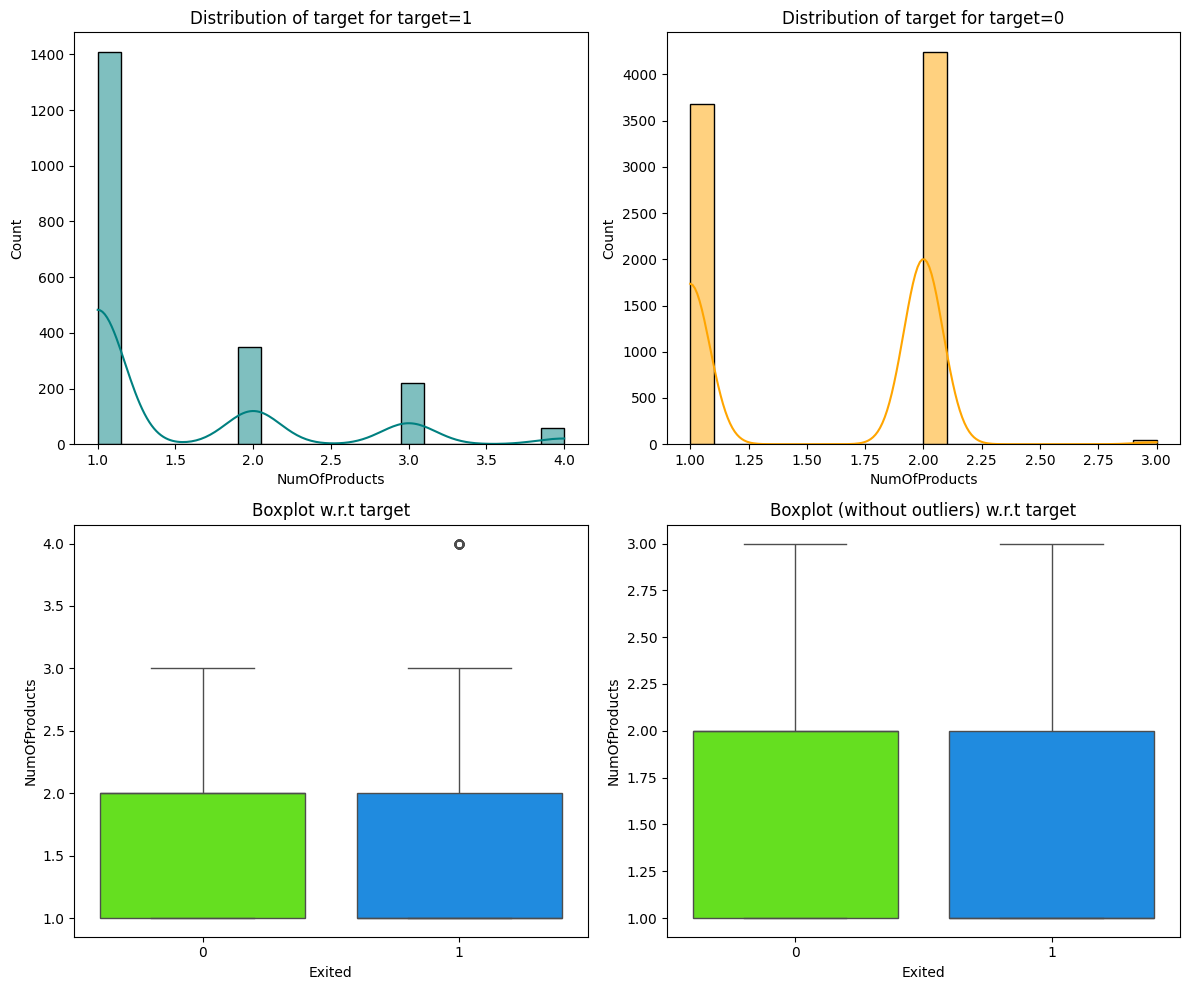

In [44]:
distribution_plot_wrt_target(Ds, "NumOfProducts", "Exited")

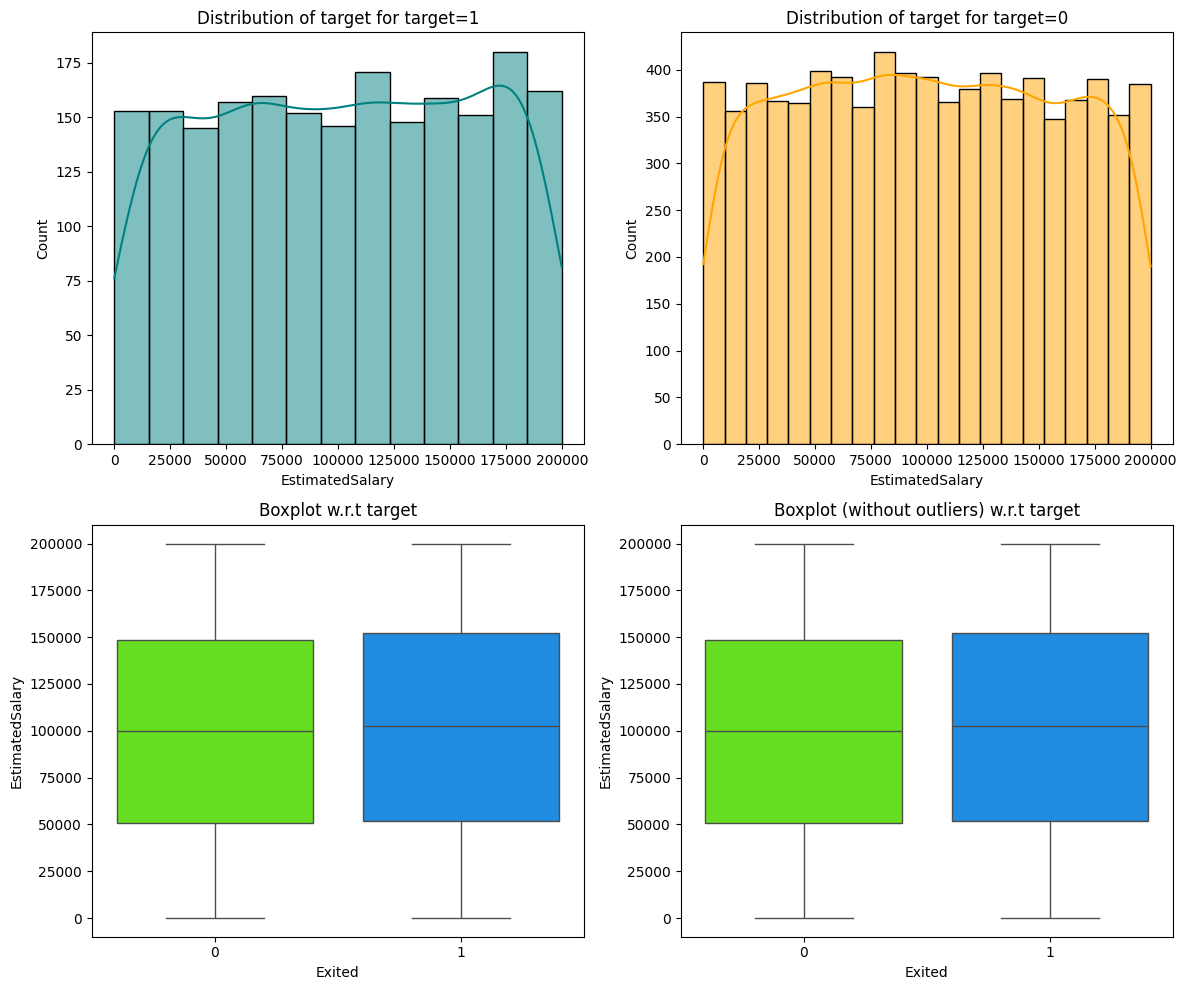

In [45]:
distribution_plot_wrt_target(Ds, "EstimatedSalary", "Exited")

In [46]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


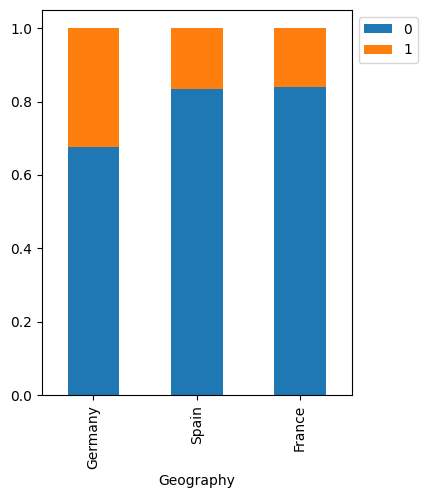

In [47]:
stacked_barplot(Ds, "Geography", "Exited")

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


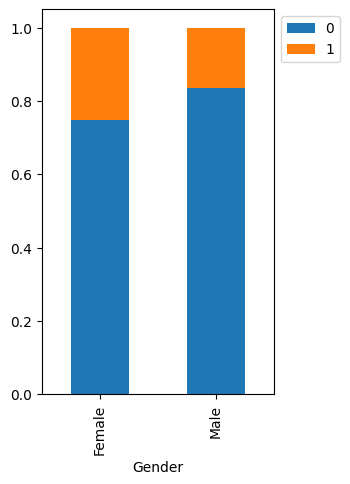

In [48]:
stacked_barplot(Ds, "Gender", "Exited")

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


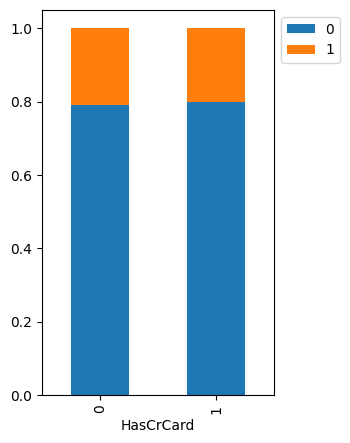

In [49]:
stacked_barplot(Ds, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


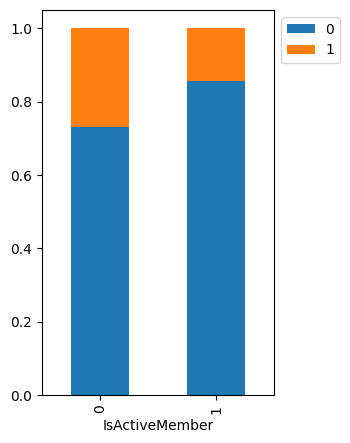

In [50]:
stacked_barplot(Ds, "IsActiveMember", "Exited")

###  Target variable Vs Categorical variables

<Axes: xlabel='IsActiveMember', ylabel='count'>

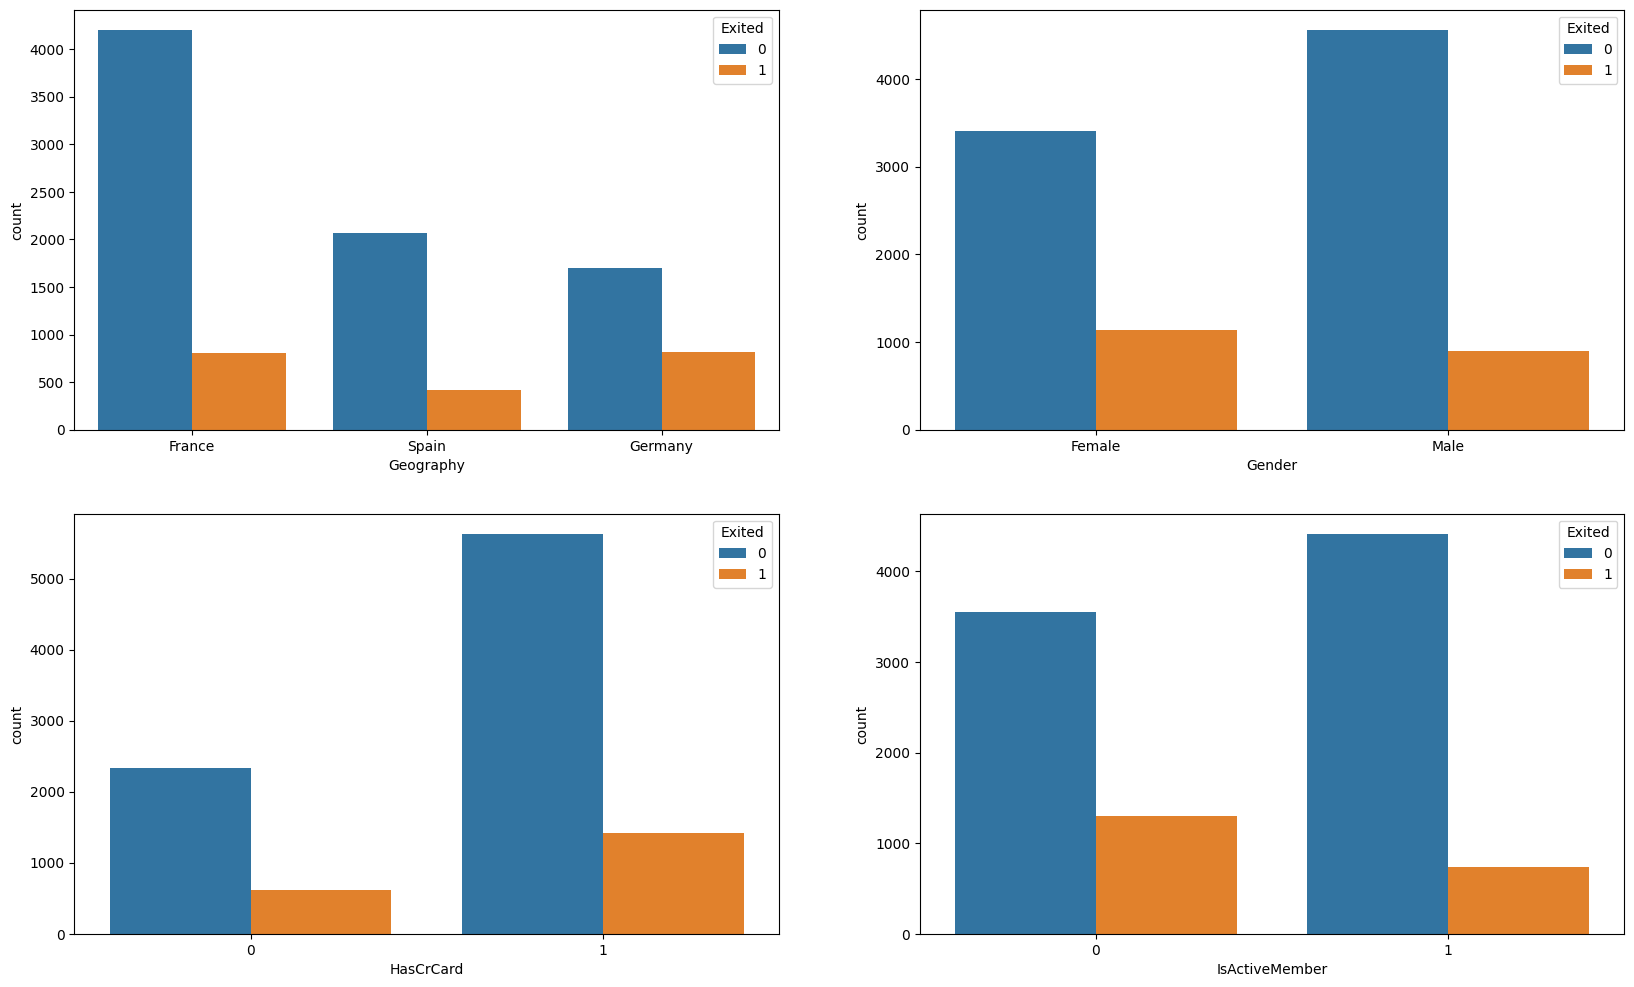

In [51]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = Ds, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = Ds, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = Ds, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = Ds, ax=axarr[1][1])

### Target variable Vs Numerical variables

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

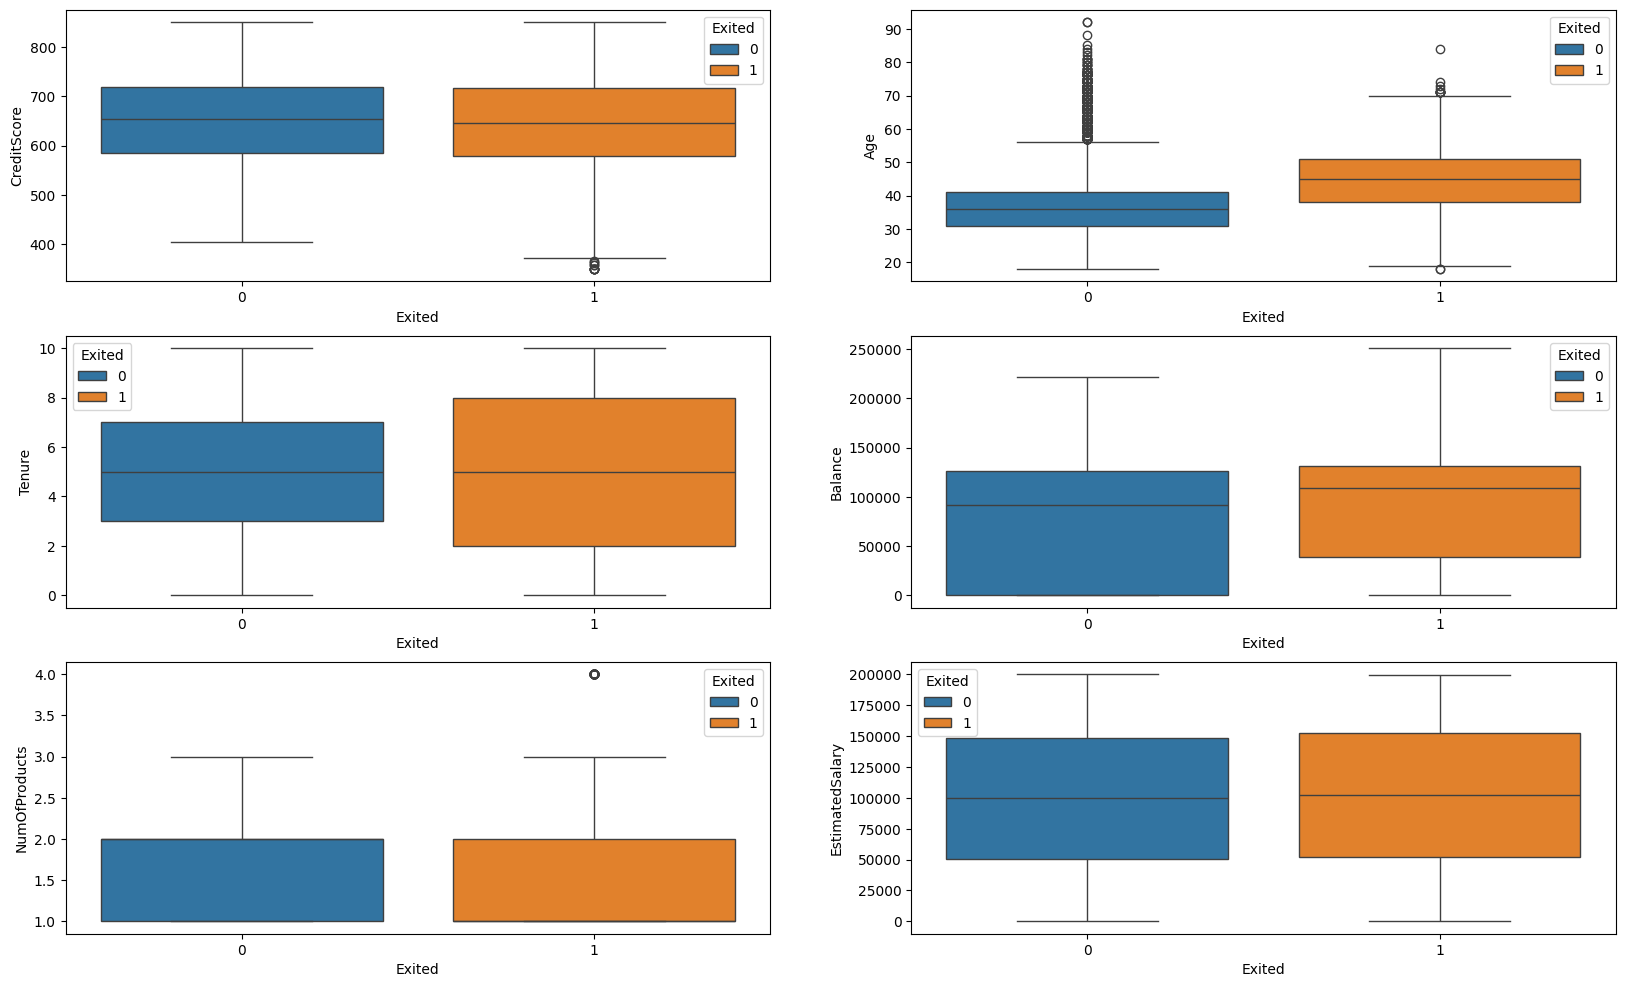

In [52]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = Ds, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = Ds , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = Ds, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = Ds, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = Ds, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = Ds, ax=axarr[2][1])

### Pairplot

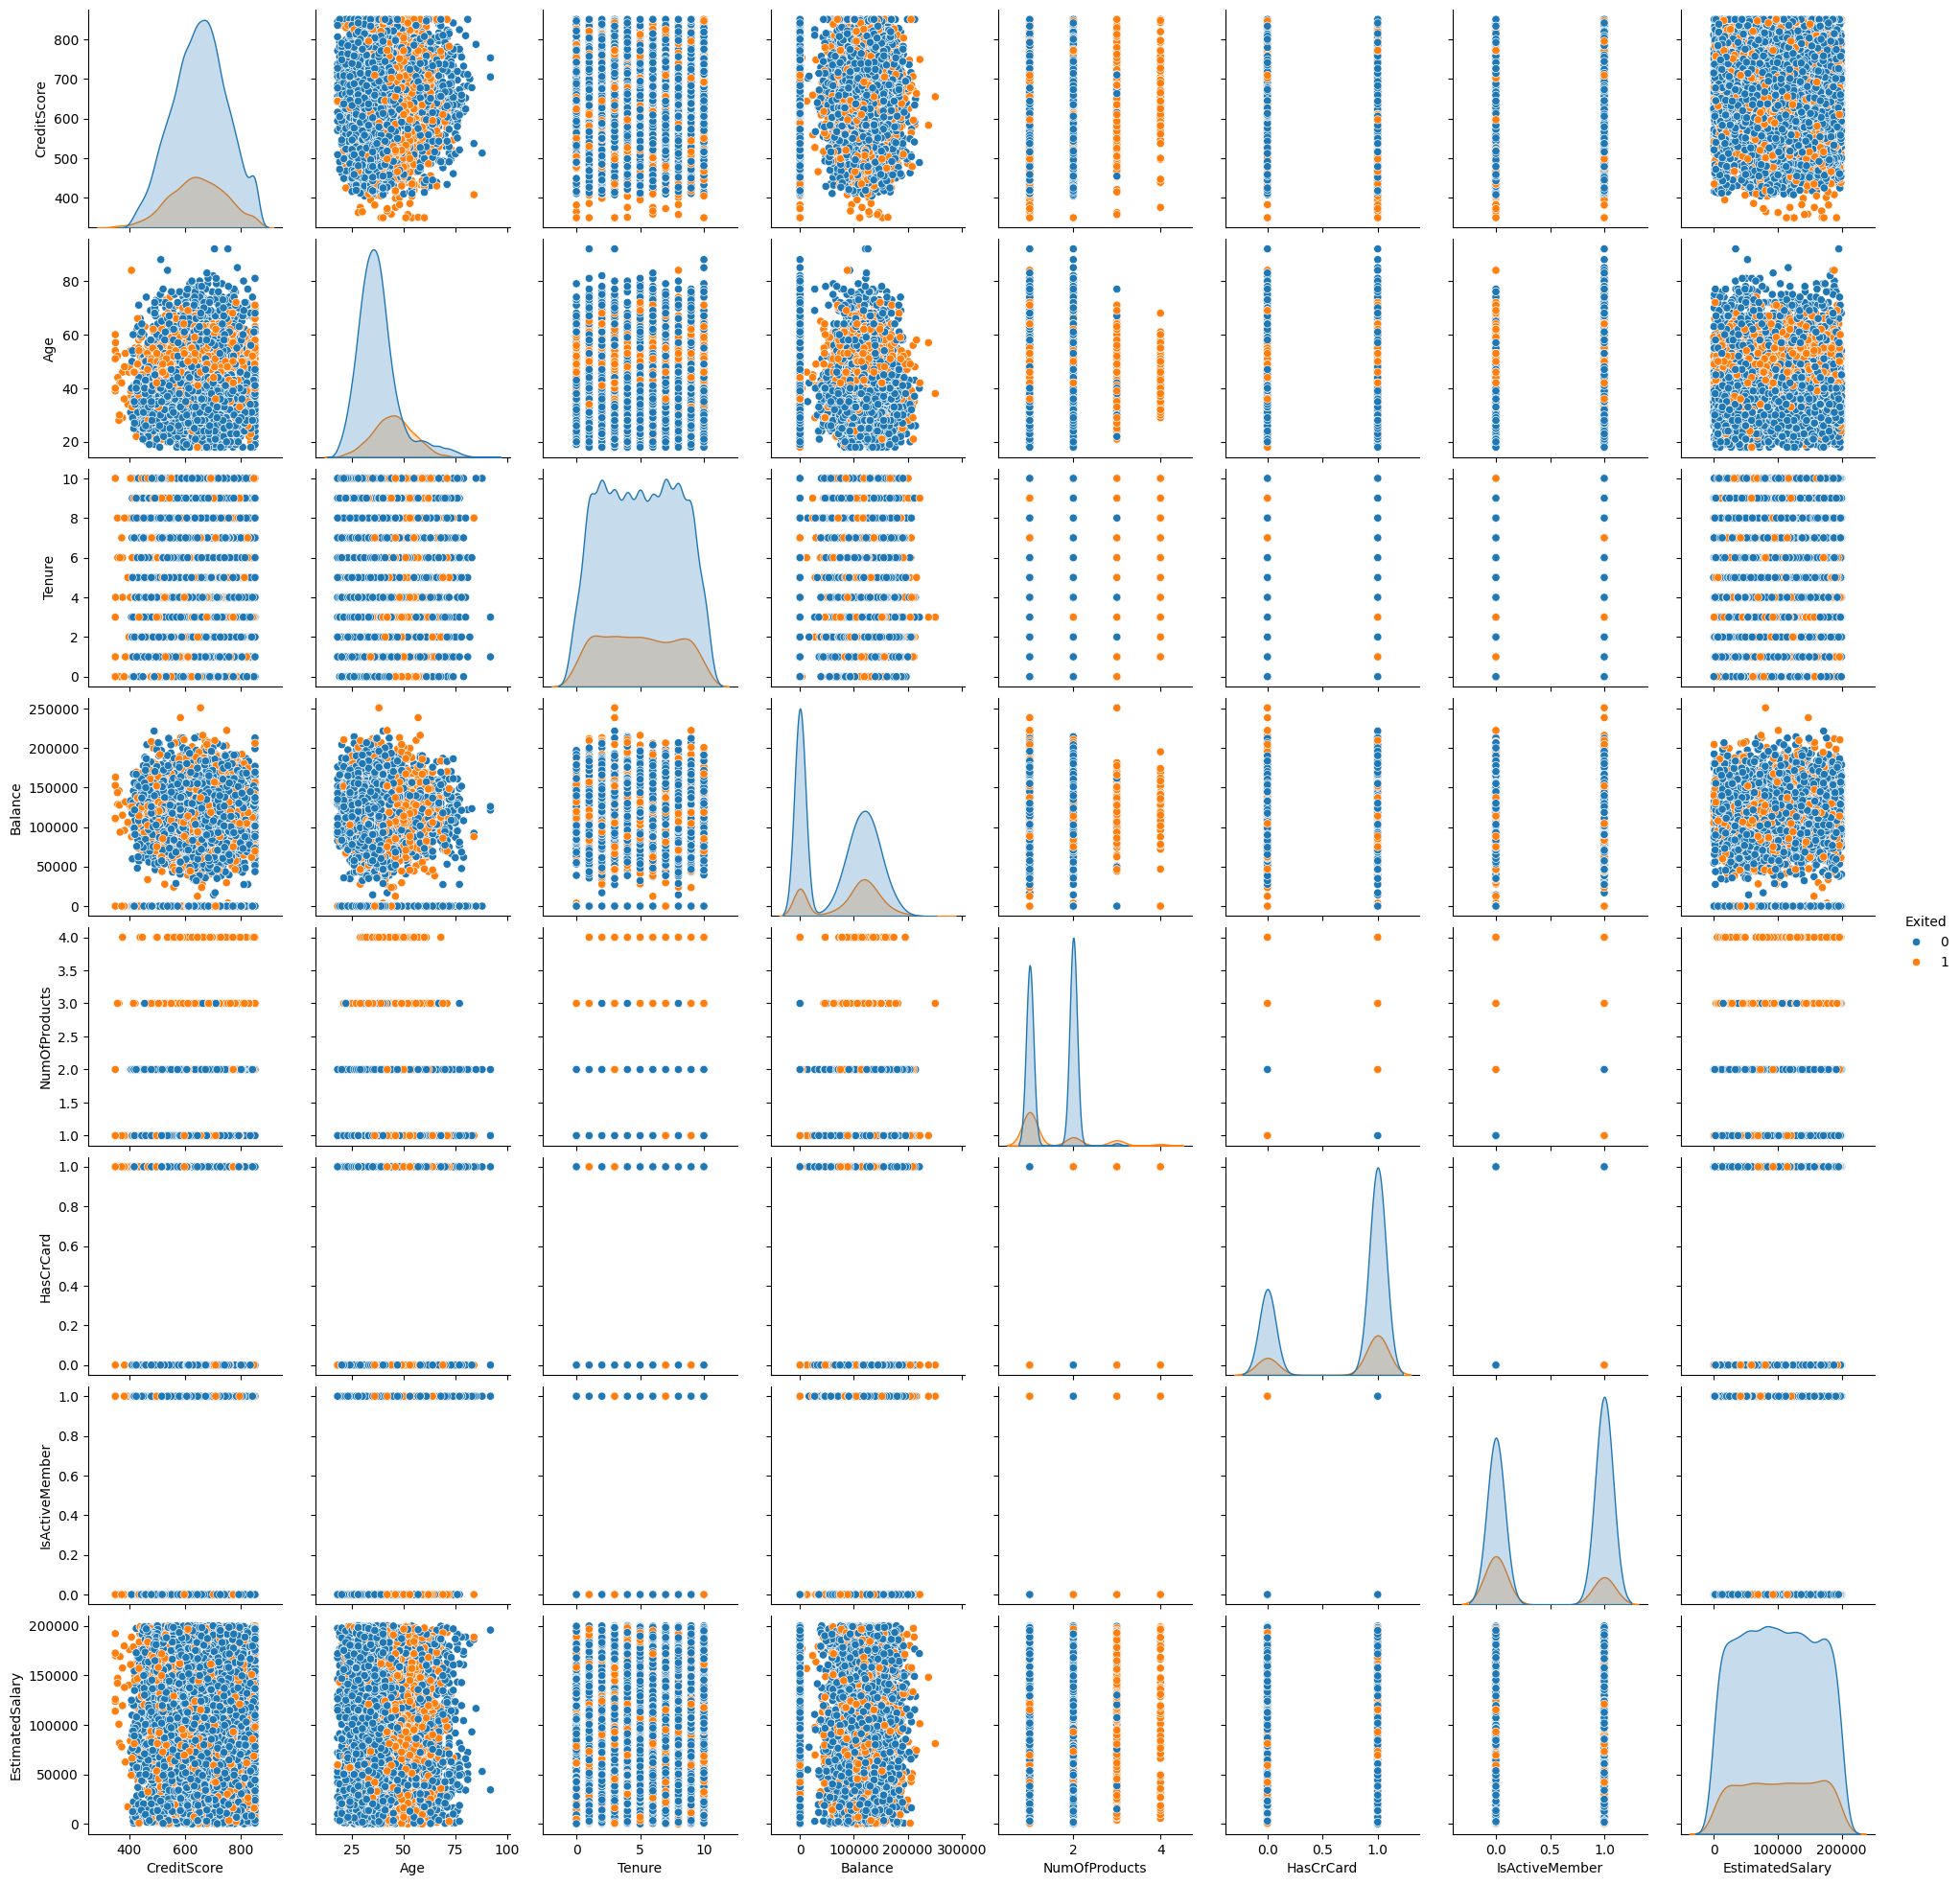

In [53]:
sns.pairplot(Ds, diag_kind = 'kde', hue = 'Exited')

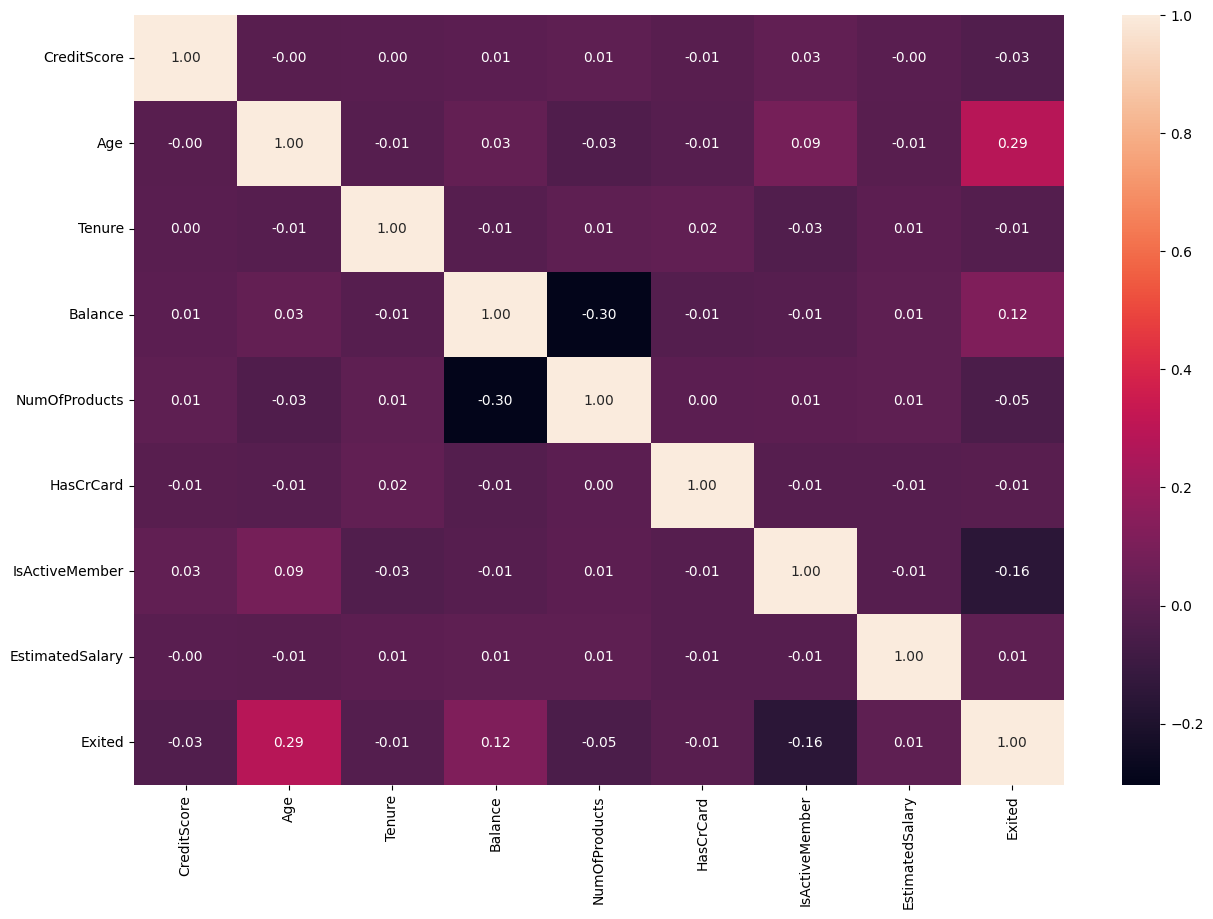

In [54]:

# Selecting only the numeric columns
numeric_Ds = Ds.select_dtypes(include='number')

# Plotting the heatmap with the correlation matrix of the numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_Ds.corr(), annot=True, fmt='.2f')
plt.show()

In [55]:
## Separating all the categorical columns for imputation
cat_col_df = Ds.drop(['Geography','Gender','HasCrCard','IsActiveMember','Exited'], axis=1)

## Data Preparation for modeling

- The Objective is to predict the churn.
- Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then check it's performance

## Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

### Which case is more important?
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

### How to reduce this loss i.e need to reduce False Negative?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

### Missing Value Imputation

* We will impute the missing values in columns using their mode.

In [56]:
## Separating Independent and Dependent Columns
X = Ds.drop(['Exited'],axis=1)
Y = Ds[['Exited']]

In [57]:
Y.head()

Exited
0       1
1       0
2       1
3       0
4       0

In [58]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [59]:
X_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [60]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
------------------------------
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


### Encoding Categorical Columns

* We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.

In [61]:
from sklearn.preprocessing import LabelEncoder
labelencoder_GEO = LabelEncoder()
X_train['Geography']= labelencoder_GEO.fit_transform(X_train['Geography'])
X_test['Geography']= labelencoder_GEO.transform(X_test['Geography'])

In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder_GEN = LabelEncoder()
X_train['Gender']= labelencoder_GEN.fit_transform(X_train['Gender'])
X_test['Gender']= labelencoder_GEN.transform(X_test['Gender'])

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder_HAS = LabelEncoder()
X_train['HasCrCard']= labelencoder_HAS.fit_transform(X_train['HasCrCard'])
X_test['HasCrCard']= labelencoder_HAS.transform(X_test['HasCrCard'])

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder_IS = LabelEncoder()
X_train['IsActiveMember']= labelencoder_IS.fit_transform(X_train['IsActiveMember'])
X_test['IsActiveMember']= labelencoder_IS.transform(X_test['IsActiveMember'])

In [65]:
X_train.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2151          753          0       1   57       7       0.00              1   
8392          739          1       1   32       3  102128.27              1   
5006          755          1       0   37       0  113865.23              2   
4117          561          0       1   37       5       0.00              2   
7182          692          1       1   49       6  110540.43              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
2151          1               0        159475.08  
8392          1               0         63981.37  
5006          1               1        117396.25  
4117          1               0         83093.25  
7182          0               1        107472.99

In [66]:
y_train.head()

Exited
2151       1
8392       1
5006       0
4117       0
7182       0

In [67]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


## **Model Building**

#### **A model can make wrong predictions in the following ways:**
* Predicting an employee is looking for a job, when he/she is not looking for it.
* Predicting an employee is not looking for a job, when he/she is in fact looking for one.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. Not giving a chance to a deserving employee (by wrongly classifying them as likely to attrite) might lead to decreased productivity, and the company might lose a good employee affecting the organization's growth. However, giving chances to a non-deserving employee (as they are likely to attrite) would lead to a financial loss for the company, and giving such employees an increased amount of responsibility might again affect the company's growth.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.


### Model 1

In [68]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [69]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu',input_dim = 10, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

In [70]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7662 - loss: 5661961433907200.0000 - val_accuracy: 0.8000 - val_loss: 0.5814
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 16.2678 - val_accuracy: 0.8000 - val_loss: 0.5365
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.5388 - val_accuracy: 0.8000 - val_loss: 0.5176
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.5249 - val_accuracy: 0.8000 - val_loss: 0.5091
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.5189 - val_accuracy: 0.8000 - val_loss: 0.5049
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.5163 - val_accuracy: 0.8000 - val_loss: 0.5029
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.5151 - val_accuracy: 0.8000 - val_loss: 0.5018
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.5146 - 

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8118 - loss: 0.4836


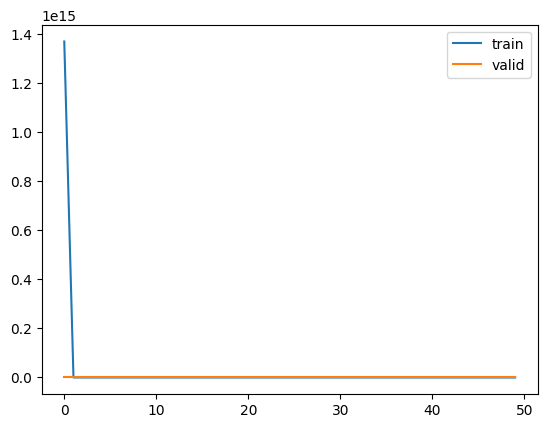

In [73]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

There is no noise in the loss behavior here. Sometimes, the loss function does not fluctuates during training, which makes the convergence fast.
Let's check the other metrices.

In [74]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [75]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

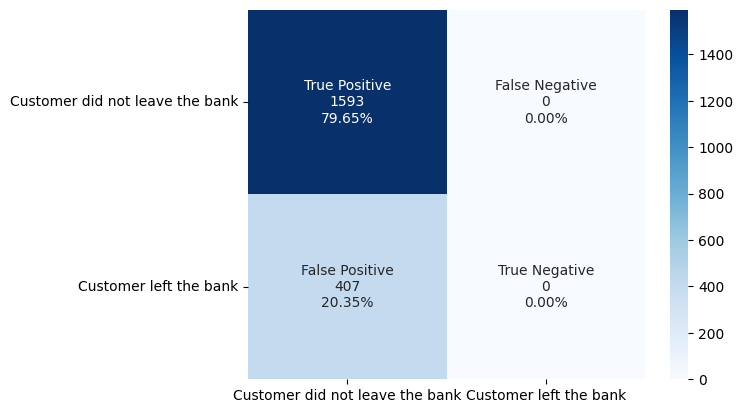

In [76]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

Here, the 0.00% of False Negatives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve.

In [77]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



As you can see, the above model has a good accuracy but a poor F1-score. This could be due to the imbalanced dataset. We observe that there is no False positive, which should be there but in a considerably lower rate.

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 2-Adam Optimizer

In [78]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [79]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [80]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,081 (180.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6625 - loss: 2055.1023 - val_accuracy: 0.7844 - val_loss: 265.1239
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6546 - loss: 660.2509 - val_accuracy: 0.6756 - val_loss: 896.2805
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - loss: 769.6786 - val_accuracy: 0.6575 - val_loss: 276.0361
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 329.6719 - val_accuracy: 0.3750 - val_loss: 182.8573
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6578 - loss: 357.5482 - val_accuracy: 0.5794 - val_loss: 552.9030
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - loss: 361.6559 - val_accuracy: 0.5163 - val_loss: 412.1781
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - loss: 346.7047 - val_accuracy: 0.6375 - val_loss: 104.6161
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6542 - lo

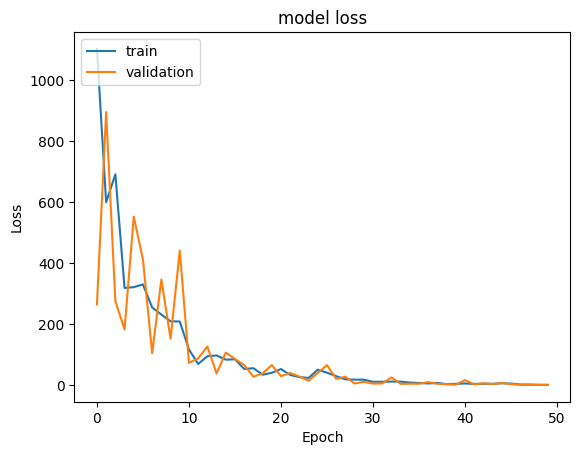

In [82]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we increased the depth of the neural network and changed the optimizer to Adam, we can see fluctuations in loss curves for both train and validation.

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Best Threshold=0.004123, G-Mean=0.513


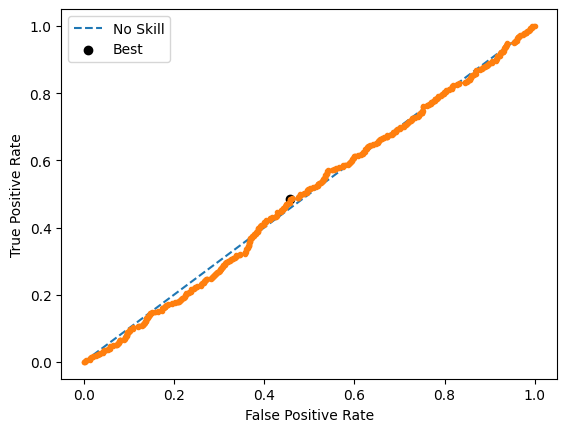

In [83]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(),

and select the threshold with the **largest G-Mean value.**

In [84]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

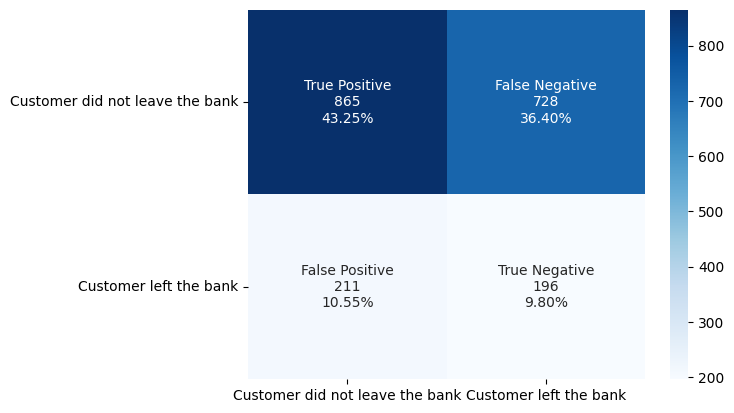

In [85]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [86]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.54      0.65      1593
           1       0.21      0.48      0.29       407

    accuracy                           0.53      2000
   macro avg       0.51      0.51      0.47      2000
weighted avg       0.68      0.53      0.58      2000



As the number of layers in the neural network has increased, we can see that the macro F1 score and accuracy has decreased, and the False Negative percentage has increased in an abnormal rate.

Now let's try to use the Batch Normalization technique and check to see if we can increase the F1 score

### Model 3-BatchNormalization

In [87]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [88]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [89]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [90]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [91]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6708 - loss: 0.6577 - val_accuracy: 0.7875 - val_loss: 0.5259
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.5138 - val_accuracy: 0.7937 - val_loss: 0.5167
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.5119 - val_accuracy: 0.7862 - val_loss: 0.5221
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.5104 - val_accuracy: 0.7962 - val_loss: 0.5164
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.5089 - val_accuracy: 0.8006 - val_loss: 0.5111
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.5078 - val_accuracy: 0.8006 - val_loss: 0.5093
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.5069 - val_accuracy: 0.8006 - val_loss: 0.5107
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.5060 - val_accuracy: 0.

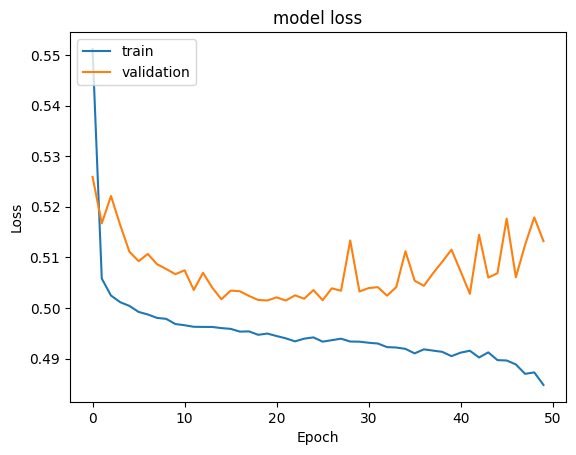

In [92]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In the above plot we observe that there is a lot of noise in the model, and it seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Best Threshold=0.170448, G-Mean=0.569


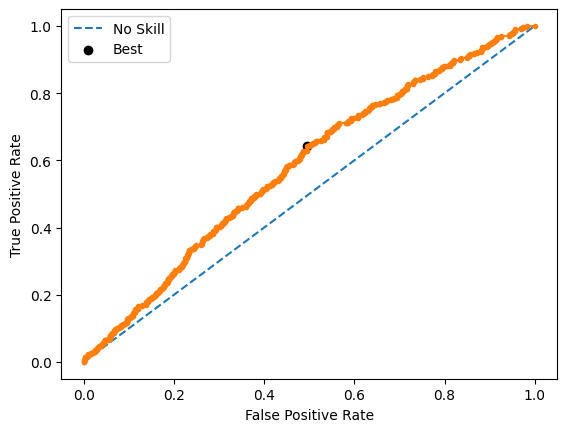

In [93]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [94]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

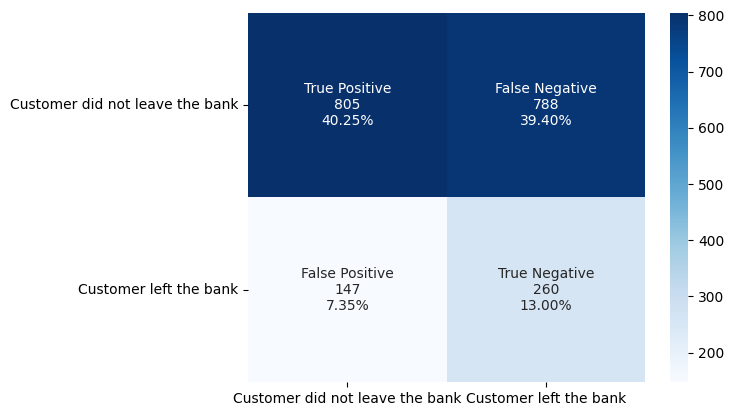

In [95]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [96]:
#Accuracy as per the classification report
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.85      0.51      0.63      1593
           1       0.25      0.64      0.36       407

    accuracy                           0.53      2000
   macro avg       0.55      0.57      0.50      2000
weighted avg       0.72      0.53      0.58      2000



The Train and Validation curves seem to show overfitting.In addition it has a bad F1 score and a very high False Negative rate.

Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate.

### Model 4-Dropout technique

In [97]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [98]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [99]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,081 (180.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [101]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6256 - loss: 1510.3408 - val_accuracy: 0.8000 - val_loss: 47.4966
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6634 - loss: 113.2334 - val_accuracy: 0.7975 - val_loss: 8.1306
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 42.6112 - val_accuracy: 0.7994 - val_loss: 6.7460
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6723 - loss: 23.2307 - val_accuracy: 0.8000 - val_loss: 5.2918
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6762 - loss: 11.9245 - val_accuracy: 0.8000 - val_loss: 0.6878
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - loss: 8.0804 - val_accuracy: 0.8000 - val_loss: 1.0559
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6821 - loss: 5.2996 - val_accuracy: 0.8000 - val_loss: 0.6840
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: 3.6064 - val_acc

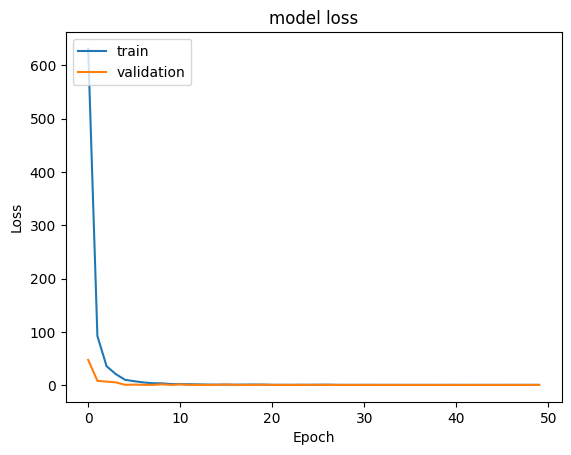

In [102]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both the curves train and validation are smooth.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Best Threshold=0.204028, G-Mean=0.043


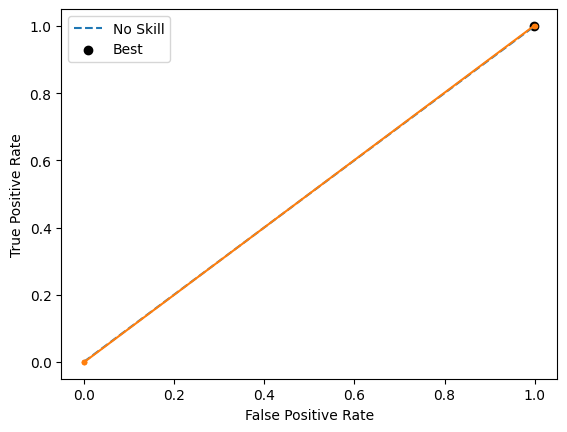

In [103]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [104]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

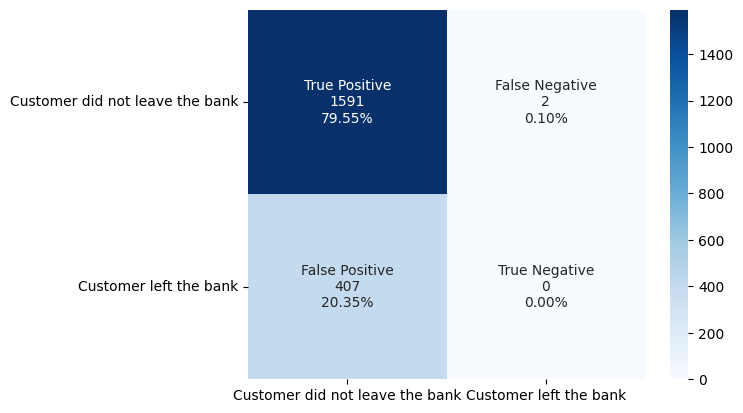

In [105]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [106]:
#Accuracy as per the classification report
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



The Dropout technique helped the model reduce the loss function of both train and validation. The F1 score also seems to be fine, with a decrease in the False Negative rate.

Now, let's try to use some of the Hyperparameter Optimization techniques,such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model.

### Model 5-Hyperparameter Optimization techniques

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [107]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [108]:
# Define the model creation function
def create_model_v4(lr=0.01,batch_size=32):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [109]:
# Create the KerasClassifier with the build function
keras_estimator = KerasClassifier(model=create_model_v4, verbose=1)

# Define the grid search parameters
param_random = {
    'batch_size': [32, 64, 128],
    'model__lr': [0.01, 0.1, 0.001],
}

# Define the RandomizedSearchCV
kfold_splits = 3
random = RandomizedSearchCV(estimator=keras_estimator,
                            param_distributions=param_random,
                            cv=kfold_splits,
                            verbose=1,
                            n_jobs=-1)

In [110]:
print(keras_estimator.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])


In [111]:
# Fit the model
random_result = random.fit(X_train, y_train, validation_split=0.2, verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7489 - loss: 97382.2812 - val_accuracy: 0.8000 - val_loss: 0.5013
Best: 0.796250 using {'model__lr': 0.1, 'batch_size': 128}
0.525256 (0.241689) with: {'model__lr': 0.01, 'batch_size': 32}
0.678140 (0.166927) with: {'model__lr': 0.1, 'batch_size': 32}
0.784002 (0.017216) with: {'model__lr': 0.001, 'batch_size': 32}
0.775620 (0.029123) with: {'model__lr': 0.01, 'batch_size': 64}
0.795875 (0.000441) with: {'model__lr': 0.1, 'batch_size': 64}
0.599275 (0.235339) with: {'model__lr': 0.001, 'batch_size': 64}
0.748006 (0.067326) with: {'model__lr': 0.01, 'batch_size': 128}
0.796250 (0.000162) with: {'model__lr': 0.1, 'batch_size': 128}
0.718385 (0.110012) with: {'model__lr': 0.001, 'batch_size': 128}


In [112]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['model__lr'])

estimator_v4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,081 (180.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['model__lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7243 - loss: 81250.3672 - val_accuracy: 0.8000 - val_loss: 0.5010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7896 - loss: 3.6465 - val_accuracy: 0.8000 - val_loss: 0.5006
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7899 - loss: 22.6824 - val_accuracy: 0.8000 - val_loss: 0.5006
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7894 - loss: 13.1381 - val_accuracy: 0.8000 - val_loss: 0.5005
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.5151 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.5155 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.5153 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.5154 - val_accura

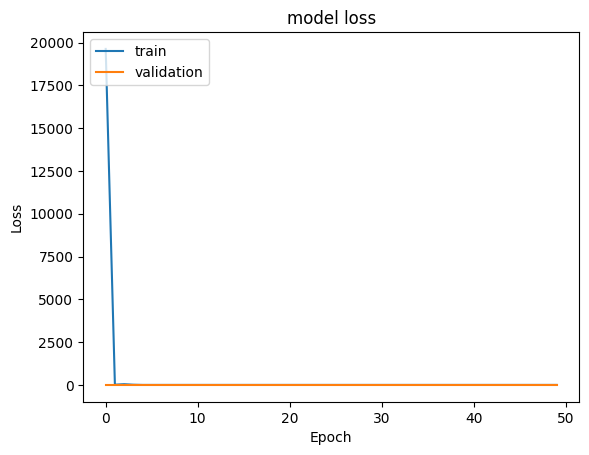

In [114]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the plot above, we observe that there is no noise in the training behavior of the model.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Best Threshold=0.201600, G-Mean=0.035


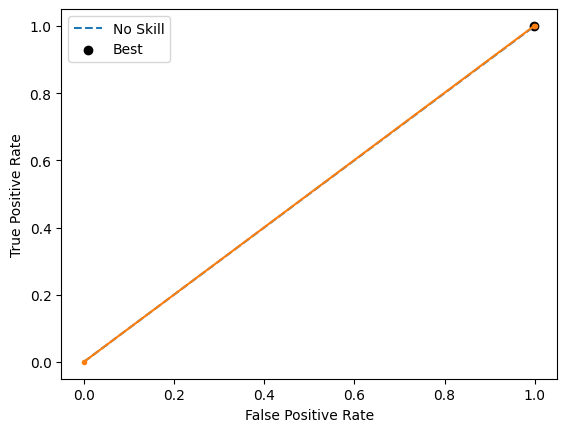

In [115]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [116]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

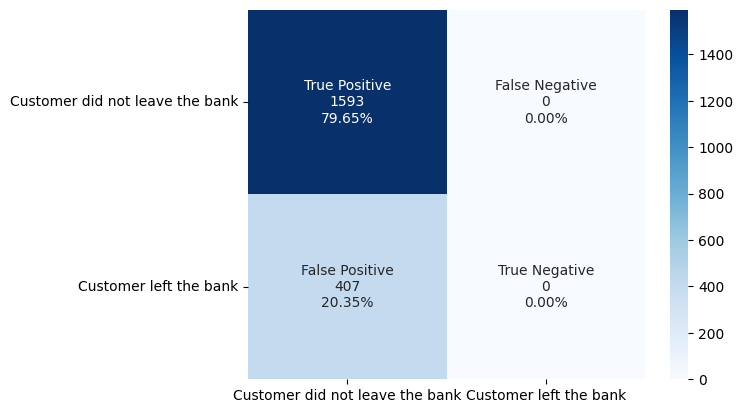

In [117]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [118]:
#Accuracy as per the classification report
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Hyperparameter tuning is used here to get a better F1 score, but the F1 score may differ each time.

Other hyperparameters can also be tuned to get better performance on the metrics.

Here, the F1 score of the model has decreased in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration.

Let's use the more exhaustive Grid Search CV and see if the F1 score increases.

### Model 6

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [119]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [120]:
def create_model_v5(lr=0.01,batch_size=32):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We're using Grid Search to optimize two hyperparameters - Batch Size & Learning Rate.

You can also optimize the other hyperparameters as mentioned above.

In [121]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "model__lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [122]:
import time

# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7641 - loss: 47250.3281 - val_accuracy: 0.8000 - val_loss: 0.5007
Best: 0.796250 using {'batch_size': 64, 'model__lr': 0.1}
Total runtime of the program is 381.2289922237396


The best model has the following configuration:

( It may vary each time the code runs )

**Result of Grid Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [123]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['model__lr'])

estimator_v5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,081 (180.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['model__lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7243 - loss: 81250.3672 - val_accuracy: 0.8000 - val_loss: 0.5010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 3.6465 - val_accuracy: 0.8000 - val_loss: 0.5006
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7899 - loss: 22.6824 - val_accuracy: 0.8000 - val_loss: 0.5006
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7894 - loss: 13.1381 - val_accuracy: 0.8000 - val_loss: 0.5005
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7898 - loss: 0.5151 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7897 - loss: 0.5155 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7898 - loss: 0.5153 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7898 - loss: 0.5154 - val_accura

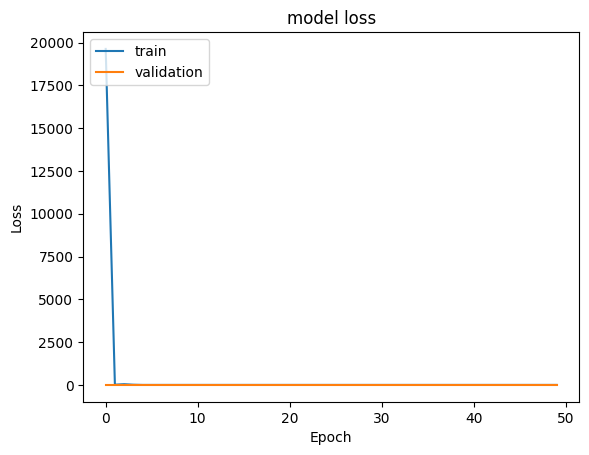

In [125]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Best Threshold=0.201600, G-Mean=0.035


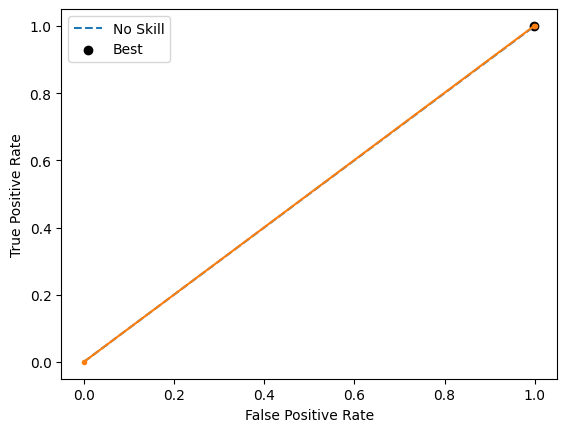

In [126]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [127]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

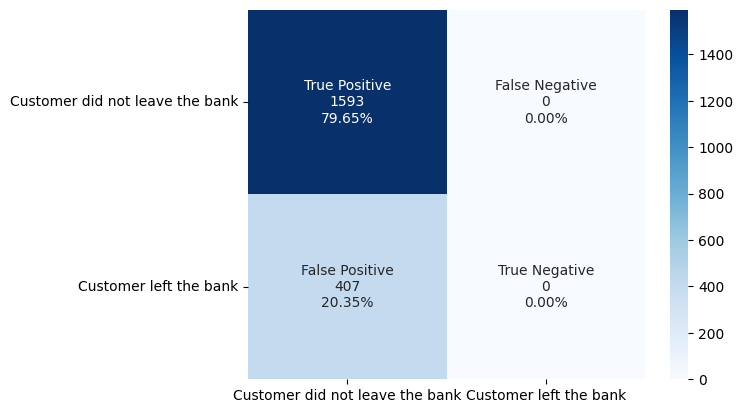

In [128]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm5,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [129]:
#Accuracy as per the classification report
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Hyperparameter tuning with Grid Search has been used here to get a better F1 score, but the F1 score might differ each time.

Other hyperparameters can also be tuned to get better metrics.

Here, the F1 score of the model, while better than in Randomized Search, is slightly lower than in Model 4 (the Dropout model).

### Dask

* There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure.
* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn.

In [130]:
#!pip install dask-ml --user

In [131]:
#!pip install dask_ml
#!pip install dask-ml --user

In [132]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV
from dask.distributed import Client

* Dask is the same as regular Grid Search in its functioning.
* We just have to change the function from GridSearchCV to DaskGridSearchCV.

In [133]:
# Define your model creation function
def create_model_v6():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model with optimizer
    optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Set your desired learning rate here
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [134]:
# Define the KerasClassifier with your model creation function
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)

# Define the grid search parameters
param_grid = {
    'batch_size': [64, 32, 128],
    'epochs': [10, 20, 30,40,50],
}

# Set up Dask client
client = Client()

# Define the DaskGridSearchCV with your KerasClassifier and param_grid
dask = GridSearchCV(estimator=keras_estimator,
                    cv=3,  # You can also use kfold_splits variable here if needed
                    param_grid=param_grid,
                    n_jobs=-1)

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34383
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34199'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43867'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37719', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37719
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:37536
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35731', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35731
INFO:distributed.core:Sta

In [135]:
print(keras_estimator.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])


In [136]:
import time
from tensorflow import keras

# store starting time
begin = time.time()

# Fit the model using DaskGridSearchCV
dask_result = dask.fit(X_train, y_train, validation_split=0.2, verbose=1)

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

# Close the Dask client
client.close()

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6528 - loss: 773.1661 - val_accuracy: 0.7181 - val_loss: 17.6200
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6859 - loss: 116.8361 - val_accuracy: 0.7994 - val_loss: 5.6489
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6789 - loss: 50.7089 - val_accuracy: 0.8000 - val_loss: 8.3497
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6783 - loss: 24.2247 - val_accuracy: 0.7937 - val_loss: 3.5195
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6794 - loss: 15.3842 - val_accuracy: 0.7738 - val_loss: 2.7927
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6732 - loss: 11.8936 - val_accuracy: 0.7200 - val_loss: 2.6011
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 8.2737 - val_accuracy: 0.8000 - val_loss: 4.1669
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6638 - loss: 6.4777 - val_acc

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34199'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43867'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:37544; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:35731', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1718633252.5251696')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:37536; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:37719', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1718633252.5325077')
INFO:distributed.scheduler:Lost all workers


Best: 0.796250 using {'batch_size': 64, 'epochs': 10}
Total runtime of the program is 983.68865442276


INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:Scheduler closing all comms


Unfortunately, Dask took more time to run the model when compared to Grid Search CV, and this is because Dask has some requirements to perform well:

* The dimension of the dataset should be large.
* Dask shows a significant performance improvement in computation when the number and range of hyperparameters we are tuning is large.

Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

We can also use another optimization technique - Keras Tuner.

In [137]:
## Install Keras Tuner
#!pip install keras-tuner

### Keras Tuner

In [138]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [139]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [140]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

In [141]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Customer_Exited_Or_Not')

In [142]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [143]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 34s]
val_accuracy: 0.7904166777928671

Best val_accuracy So Far: 0.800000011920929
Total elapsed time: 00h 02m 25s


In [144]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Customer_Exited_Or_Not
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.800000011920929

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.800000011920929

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 256
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.800000011920929

Trial 1 summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.799791673819224

Trial 4 summary
Hyperparameters:
num_layers: 10
uni

### Model 7

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [145]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [146]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [147]:
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 160)                 │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 160)                 │          25,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 224)                 │          36,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          28,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 224)                 │          28,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,505 (474.63 KB)

 Trainable params: 121,505 (474.63 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [149]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6647 - loss: 8651.7451 - val_accuracy: 0.7850 - val_loss: 1121.9973
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - loss: 999.4551 - val_accuracy: 0.7206 - val_loss: 343.6798
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 480.1127 - val_accuracy: 0.8000 - val_loss: 385.4568
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - loss: 372.1305 - val_accuracy: 0.8000 - val_loss: 214.5640
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6827 - loss: 255.8592 - val_accuracy: 0.8000 - val_loss: 74.4916
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 67.5821 - val_accuracy: 0.7713 - val_loss: 81.5248
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - loss: 69.7061 - val_accuracy: 0.8000 - val_loss: 59.5446
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6765 - loss: 

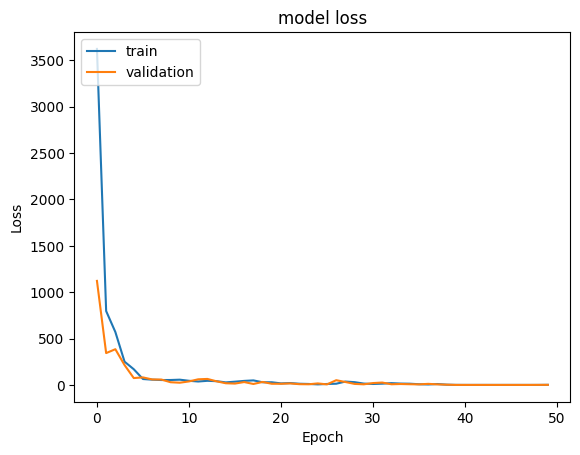

In [150]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Best Threshold=0.233257, G-Mean=0.535


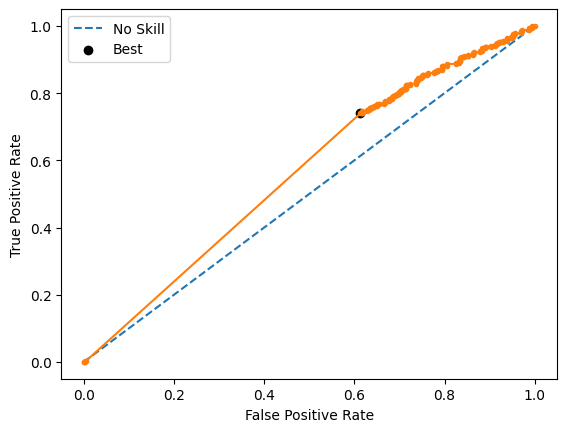

In [151]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [152]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

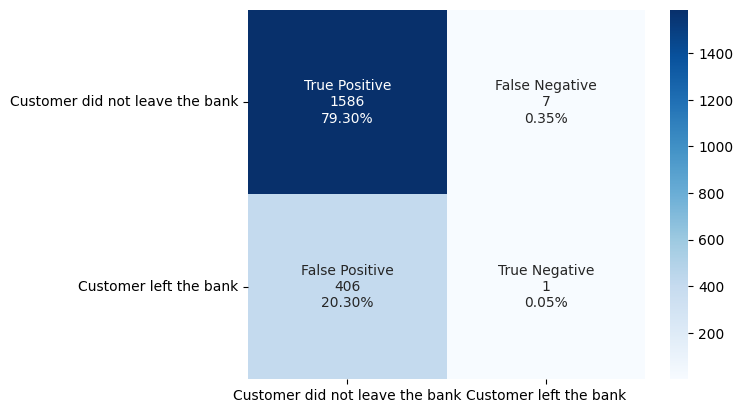

In [153]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm7,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [154]:
#Accuracy as per the classification report
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.80      1.00      0.88      1593
           1       0.12      0.00      0.00       407

    accuracy                           0.79      2000
   macro avg       0.46      0.50      0.44      2000
weighted avg       0.66      0.79      0.71      2000



* After using the suggested hyperparameters from Keras Tuner, the F1 score has slightly increased, and the False Negative rate is higher in comparison to the previous optimization technique model.

* Further, you can add Batch Normalization and Dropout to the model and check the F1 score.

* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### SMOTE + Keras Tuner

In [155]:
#pip install -U imbalanced-learn

In [156]:
#pip install -U scikit-learn

In [157]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [158]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [159]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [160]:
from keras_tuner import RandomSearch
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Customer_Exited_Or_Not')

Reloading Tuner from ./Customer_Exited_Or_Not/tuner0.json


In [161]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

In [162]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

In [163]:
## Printing the best models with their hyperparameters
tuner_2.results_summary()

Results summary
Results in ./Customer_Exited_Or_Not
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 256
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.800000011920929

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.800000011920929

Trial 0 summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.800000011920929

Trial 1 summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.799791673819224

Trial 4 summary
Hyperparameters:
num_layers: 10
uni

In [164]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [165]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [166]:
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 160)                 │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 160)                 │          25,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 224)                 │          36,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          28,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 224)                 │          28,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,505 (474.63 KB)

 Trainable params: 121,505 (474.63 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5539 - loss: 5745.2461 - val_accuracy: 0.8277 - val_loss: 66.5522
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5420 - loss: 578.7423 - val_accuracy: 0.9721 - val_loss: 0.8874
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5316 - loss: 384.4645 - val_accuracy: 0.0290 - val_loss: 442.3549
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5502 - loss: 127.4688 - val_accuracy: 0.8509 - val_loss: 24.7852
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5318 - loss: 84.9094 - val_accuracy: 0.9376 - val_loss: 0.9355
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5383 - loss: 38.5625 - val_accuracy: 0.9392 - val_loss: 2.0881
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5150 - loss: 29.8161 - val_accuracy: 0.3536 - val_loss: 71.4100
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5386 - loss: 46.8356

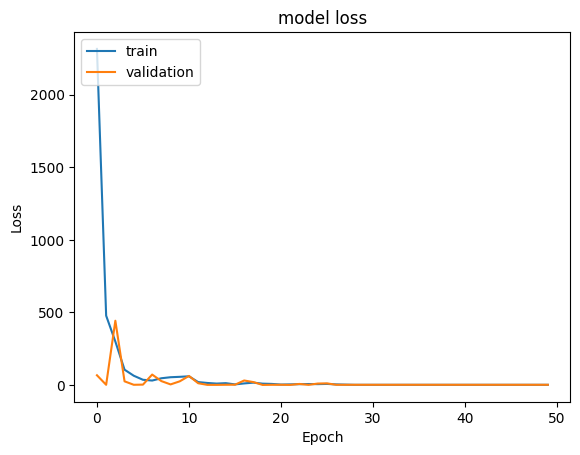

In [168]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Best Threshold=0.375847, G-Mean=0.151


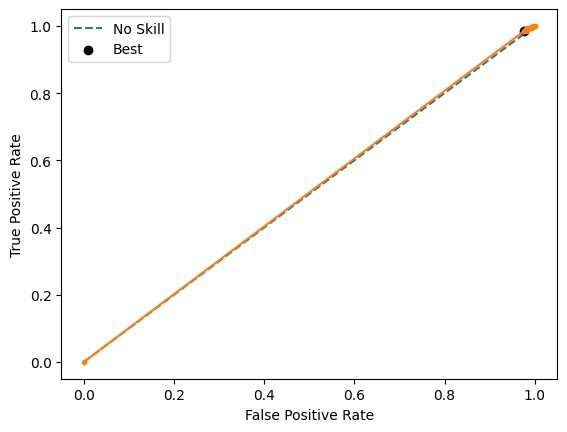

In [169]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [170]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

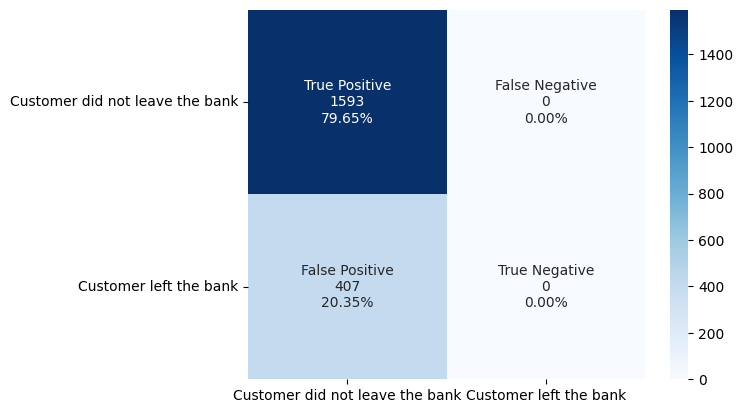

In [171]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm9,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [172]:
#Accuracy as per the classification report
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



After applying the SMOTE technique to the data, the F1 score increased, and the False Negative rate decreased, but if you see the loss curves of train and validation, the model seems to have overfit.

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [173]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [174]:
def create_model_v7(lr=0.01,batch_size=32):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [175]:
keras_estimator = KerasClassifier(build_fn=create_model_v7,verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "model__lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [176]:
import time

# store starting time
begin = time.time()

grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6629 - loss: 1144.2955 - val_accuracy: 0.8000 - val_loss: 1.0828
Best: 0.796250 using {'batch_size': 64, 'model__lr': 0.01}
Total runtime of the program is 401.87085366249084


In [177]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['model__lr'])

estimator_v7.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,081 (180.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['model__lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5491 - loss: 853.6093 - val_accuracy: 0.0000e+00 - val_loss: 0.8796
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6060 - loss: 1.8290 - val_accuracy: 0.0000e+00 - val_loss: 1.0057
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6204 - loss: 0.9804 - val_accuracy: 0.0000e+00 - val_loss: 1.0251
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6257 - loss: 0.8196 - val_accuracy: 0.0000e+00 - val_loss: 0.9822
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6252 - loss: 0.7319 - val_accuracy: 0.0000e+00 - val_loss: 0.9946
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6288 - loss: 0.7375 - val_accuracy: 0.0000e+00 - val_loss: 0.9835
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6273 - loss: 0.7208 - val_accuracy: 0.0000e+00 - val_loss: 0.9859
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6289 -

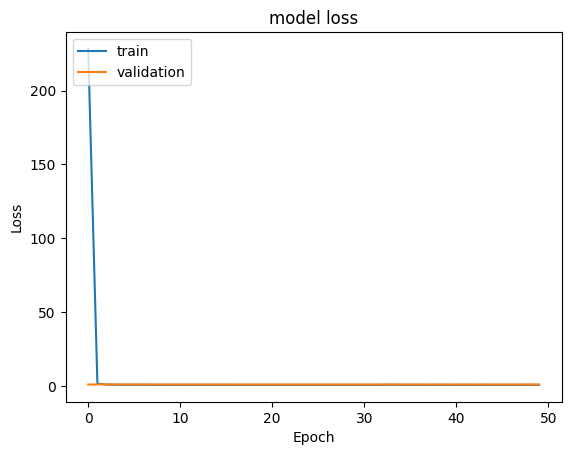

In [179]:

#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


From the above plot, we observe that there is a lot of noise in the model.

Grid Search CV also does not seem to work that well on the SMOTE data.

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Best Threshold=inf, G-Mean=0.000


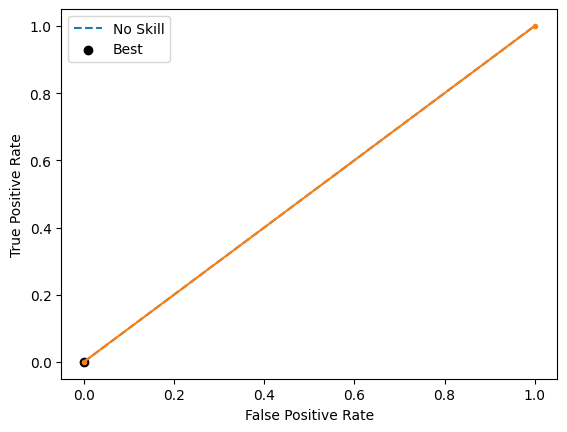

In [180]:

from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [181]:

y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

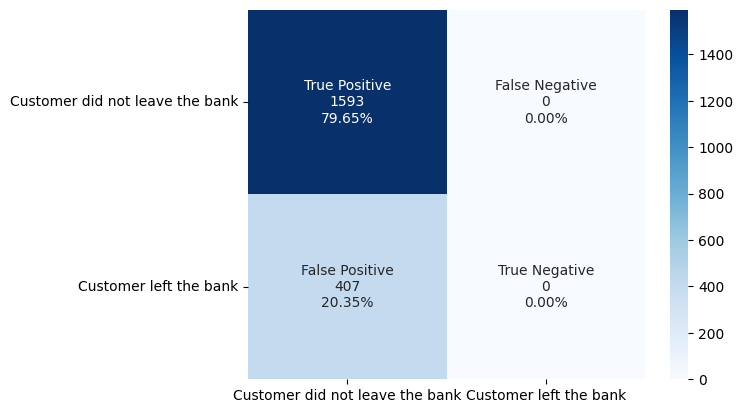

In [182]:

#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm10,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


In [183]:

#Accuracy as per the classification report
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Oversampling using SMOTE did not help improve the F1 score.

In this dataset, the SMOTE oversampling technique does not work well, as both the models we tried building have overfitted on the training dataset.

So, our final model here can be **Model 4**, which uses the Dropout regularization technique and works on the imbalanced dataset.

### Suggested Areas of Improvement

* Build any one Machine Learning model, and use that to get the feature importance of the variables. Try to use that in the neural network model.

* You can try to do better feature engineerning by removing the flaws of the skewed variables if required.

### Business Recommendations

* The HR department of the company can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether an employee is likely to switch jobs or not, and this process seems to be easier and more time-efficient than other methods.

The optimised model gives better results as seen from the confusion matrix as well as an improved F1 score.


We encourage you to further look to optimize the model and come up with better results.

# **Save the model4**

In [184]:
model3.save('my_model.keras')

In [185]:
from google.colab import files

# For TensorFlow/Keras
files.download('my_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>